# Исследование объявлений о продаже квартир

<font color='DarkBlue'><b><u>Цель исследования</u></b> - проведение исследовательского анализа данных архива объявлений о продаже квартир, определение факторов, влияющих на стоимость объектов

<font color='DarkBlue'><b><u>Задачи исследования</u></b><br>1. провести анализ ключевых характеристик выставляемых на продажу объектов недвижимости, сформировать и оценить среднестатистический продаваемый объект<br>2. оценить скорость продажи квартир<br>3. выявить факторы, существенно влияющие на ценообразование<br>4. выявить населенные пункты с самой высокой и самой низкой ценой за квадратный метр<br>5. рассмотреть взаимосвязь цены за квадратный метр и удаленности объекта от центра в населенном пункте с наибольшим количеством объявлений

<font color='DarkBlue'><b><u>План исследования</u></b><br>1. загрузка и обзор данных<br>2. предобработка данных, создание дополнительных (производных) показателей<br>3. исследовательский анализ данных о параметрах выставляемых на продажу квартир, данных о сроках размещения объявлений<br>4. анализ факторов, влияющих на стоимость картиры, цен за 1кв метр<br>5. анализ данных о квартирах, продаваемых в Санкт-Петербурге

## Загрузка и обзор данных

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [7]:
data = pd.read_csv('C:\\DA\\projects\\real_estate\\real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<font color='DarkBlue'><i>Изменим некорректное название одного столбца

In [10]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

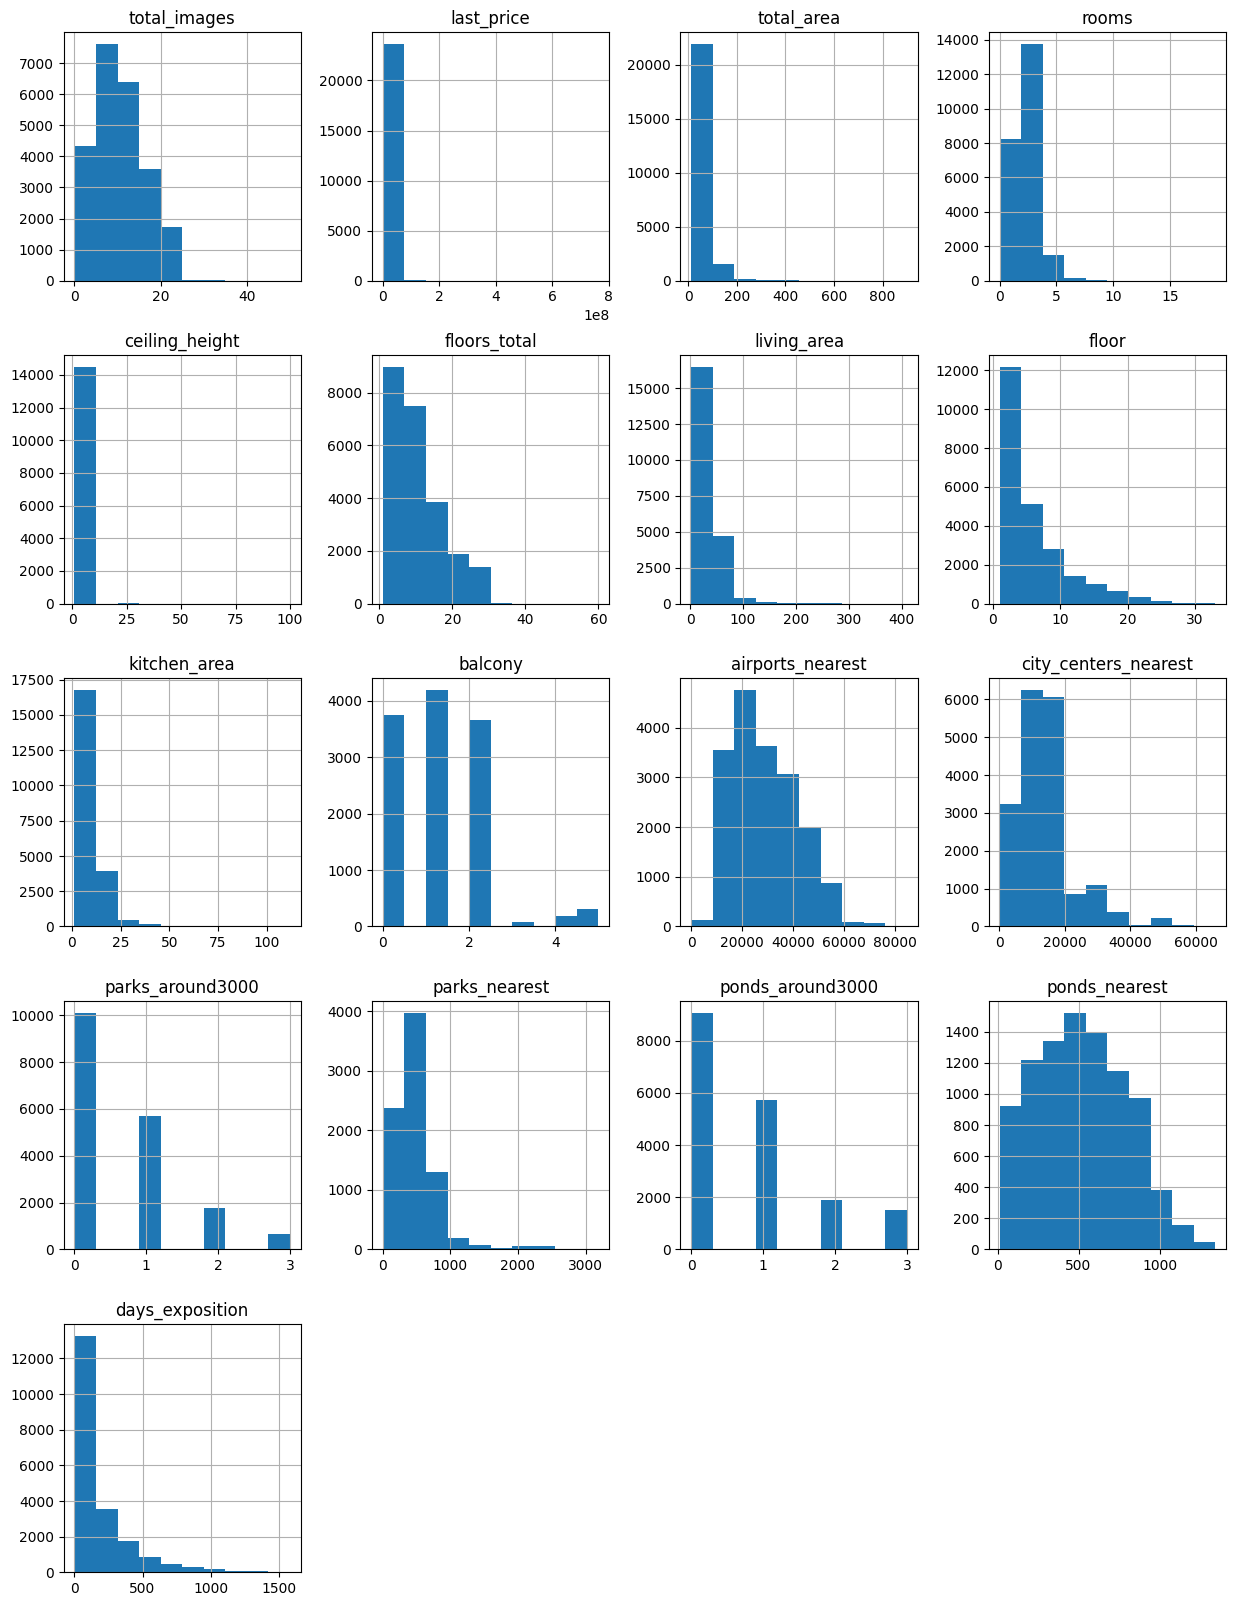

In [11]:
data.hist(figsize=(15,20));

<font color='DarkBlue'><b> Резюме</b><br> Даные для анализа - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 5 лет предоставленны в файле real_estate_data.csv и содержат 23699 записей по 22 параметрам объявлений о продаже, в том числе: местоположение (включая расстояние до парков, водоемов, аэропорта и центра города) и площадь (общая, жилая, кухни) объекта, количество этажей, стоимость и пр.). Данные содержат пропуски, которые будут обработаны в рамках этапа предобработки данных. Наименование колонки 'cityCenters_nearest' скорректировано на 'city_centers_nearest'.

## Предобработка данных

### Дубликаты

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

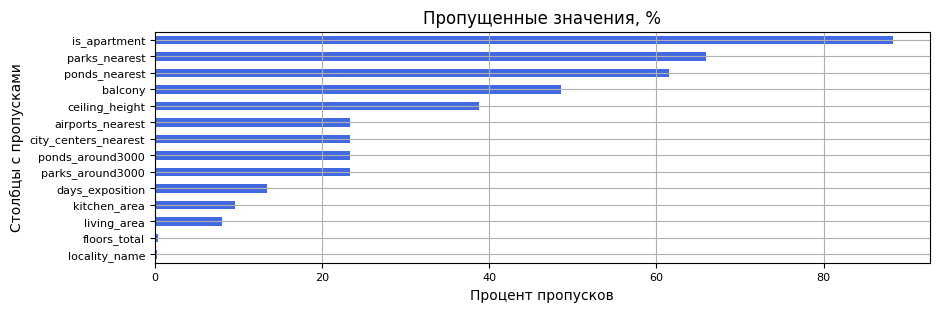

In [16]:
# функция для обзора данных
if data.isnull().sum().sum() != 0:
    try:
        (data.isna().mean()*100).to_frame() \
        .rename(columns = {0:'space'}) \
        .query('space > 0') \
        .sort_values(by = 'space', ascending = True) \
        .plot(kind = 'barh', figsize = (10, 3), legend = False, fontsize = 8, color='royalblue', \
              title ='Пропущенные значения, %', \
              xlabel = 'Процент пропусков', \
              ylabel='Столбцы с пропусками', \
              grid=True, style='-',)
        plt.show();    
    except:
        print('Пропусков данных нет')
else:
     print('Пропусков данных нет')

### Данные о названии населенного пункта

In [18]:
print('Уникальных наименований населенных пунктов в исходном датасете - {}'.format(data.locality_name.nunique()))
data['locality_name'].unique()

Уникальных наименований населенных пунктов в исходном датасете - 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
# пропуски заполним значением 'unknown'
data['locality_name'] = data['locality_name'].fillna(value='unknown')

In [20]:
# заменим различные варианты написания поселков на просто "поселок"
data = data.replace(regex=['посёлок', 'городской поселок', \
              'коттеджный поселок', 'котеджный поселок',\
              'поселок при железнодорожной станции', 'поселок станции', \
              'городской поселок', 'поселок городского типа', \
              'садоводческое некоммерческое товарищество', 'садовое товарищество'], \
             value='поселок')
data['locality_name'] = data['locality_name'].replace('Мурино', 'поселок Мурино')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

In [21]:
print('После обработки наименований уникальных наименований населенных пунктов в датасете - {}'.format(data.locality_name.nunique()))
sorted(data['locality_name'].unique())

После обработки наименований уникальных наименований населенных пунктов в датасете - 334


['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Фёдоровское',
 'городской поселок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бег

<font color='DarkBlue'><i> После обработки названий населенных пунктов повторно проверим данные на наличие неявных дубликатов по сумме ключевых параметров

In [23]:
duplicateRows = data[data.duplicated(['total_area', 'floor', 'floors_total', 'city_centers_nearest', \
                                      'locality_name', 'rooms', 'balcony'], keep=False)]
duplicateRows.sort_values(by='locality_name').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19972,20,4361004.0,62.4,2015-09-20T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,unknown,22041.0,17369.0,0.0,NaN,1.0,374.0,278.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,unknown,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
432,12,1490000.0,36.0,2018-09-10T00:00:00,1,2.50,5.0,17.1,3,NaN,...,8.4,2.0,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,23.0
15180,5,1800000.0,36.0,2017-12-15T00:00:00,1,2.55,5.0,17.0,3,NaN,...,8.3,2.0,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,94.0
8361,4,1250000.0,30.0,2017-06-18T00:00:00,1,2.50,5.0,16.0,4,NaN,...,6.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,324.0
22602,0,2000000.0,67.0,2018-03-28T00:00:00,2,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9735,14,2550000.0,67.0,2017-07-05T00:00:00,2,NaN,5.0,40.0,1,NaN,...,11.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,402.0
9441,8,1200000.0,30.0,2018-11-21T00:00:00,1,2.60,5.0,18.0,4,NaN,...,6.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,92.0
19119,3,3700000.0,51.0,2019-02-24T00:00:00,2,2.60,5.0,29.7,3,NaN,...,8.3,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,45.0
22871,15,3200000.0,51.0,2016-12-21T00:00:00,3,2.50,5.0,36.0,1,NaN,...,6.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,481.0


<font color='DarkBlue'><i>Выявленные дубликаты - это объявления, в которых изменилась цена, при этом объявление с предыдущей ценой не снято. Такие дубликаты необходимо удалить, оставив наиболее поздние, для чего вначале отсортируем дата-сет по возрастанию даты, а затем удалим дубликаты, оставив "поледний"

In [25]:
data = data.sort_values(by='first_day_exposition')
data = data.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'city_centers_nearest', \
                                      'locality_name', 'rooms', 'balcony'], keep='last')

### Данные о количестве балконов 

<font color='DarkBlue'><i>Пропуски в данных о количесвте балконов заменим на '0', исходя из предположения, что если не указано количество балконов, значит предполагается, что балкона нет

In [28]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

<font color='DarkBlue'><i>Проверим на наличие аномальных значений в данных о количестве балконов

In [30]:
data.groupby('balcony')['locality_name'].count()

balcony
0.0    15202
1.0     4182
2.0     3649
3.0       81
4.0      181
5.0      302
Name: locality_name, dtype: int64

<font color='DarkBlue'><i> Наличие у квартир 4 и 5 балконов вызывает сомнения, но пока оставим как есть, т.к. маловероятно, что подобные аномальные значения имеют какое-то существенное влияние на анализ данных

### Данные о принадлежности объекта к апартаментам

<font color='DarkBlue'><i>Пропуски в данных о принадлежности объекта к апартамнетам, заполним 'False', исходя из предположения, что если не указан тип - значит это не апартаменты

In [34]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

C:\Users\Svetlana\AppData\Local\Temp\ipykernel_23576\1998304596.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


0

### Данные о высоте потолков и количестве этажей в доме

<font color='DarkBlue'><i>Пропуски в данных о высоте потолков и количестве этажей в доме заменим медианным значением для соответствующего населенного пункта, для чего напишем фунукцию замены пропуска количесвтенного значения в столбце на медианное значение по группе.В качестве группировки выберем населенный пункт, исходя из пердположения, что в одном населенном пункте соблюдаются некоторые стандарты строительства

In [37]:
def zero_parametr_mediana(parametr):
    try:
        for location in data['locality_name'].unique():
            if data.loc[(data['locality_name'] == location), parametr].notna():
                data.loc[(data['locality_name'] == location)&(data[parametr].isna()), parametr] = \
                data.loc[(data['locality_name'] == location), parametr].median()
    except:
        pass
zero_parametr_mediana('ceiling_height')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о высоте потолков'.format(data['ceiling_height'].isna().sum(), data['ceiling_height'].isna().sum() / data.shape[0]))

В датасете осталось 9152 записей (или 38.78%) с пропуском информации о высоте потолков


<font color='DarkBlue'><i>Проверим на наличие аномальных значений в данных о высоте потолков

In [39]:
data.ceiling_height.describe(percentiles=[0.01, 0.5, 0.99])

count    14445.000000
mean         2.770373
std          1.249923
min          1.000000
1%           2.500000
50%          2.650000
99%          3.825600
max        100.000000
Name: ceiling_height, dtype: float64

In [40]:
# исходя из предположения, что вы сота потолков более 20 м. - это ошибка при вводе разделим значения на 10
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

In [41]:
data.ceiling_height.describe(percentiles=[0.01, 0.5, 0.99])

count    14445.000000
mean         2.729868
std          0.320166
min          1.000000
1%           2.500000
50%          2.650000
99%          3.791200
max         14.000000
Name: ceiling_height, dtype: float64

<font color='DarkBlue'><i>Высота потолков от 4 м до 14 м, также вызывает вопросы, но устраненеи этих аномальных значений отложим на этап исследовательского анализа

In [43]:
zero_parametr_mediana('floors_total')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о количестве этажей' \
      .format(data['floors_total'].isna().sum(), data['floors_total'].isna().sum() / data.shape[0]))

В датасете осталось 86 записей (или 0.36%) с пропуском информации о количестве этажей


Проверим на наличие аномальных значений в данных о количесвте этажей в зданиях

In [45]:
display(data.floors_total.describe(percentiles=[0.01, 0.5, 0.99]))
data['floors_total'].unique()

count    23511.000000
mean        10.684913
std          6.598389
min          1.000000
1%           2.000000
50%          9.000000
99%         26.000000
max         60.000000
Name: floors_total, dtype: float64

array([20.,  5.,  4., 25.,  8.,  9., 11., 12., 22., 16., 13., 17., 10.,
       15., 18.,  6.,  3.,  2., 14., 23., 24., 27.,  7., 21., 35., 19.,
       28., nan, 26., 33.,  1., 37., 34., 36., 60., 29., 52.])

<font color='DarkBlue'><i>С учетом того, что Санкт Петербурге самое высокое здание имеет этажность - 87 этаже, предположим, что в данных нет аномальных значений

<font color='DarkBlue'><i> Для строк, где среднее количесто этажей в доме по группе оказалось меньше, чем этаж, присваиваем количеству этажей в доме значение равное этажу квартиры

In [48]:
data['floors_total_new'] = np.where((data['floors_total'] >= data['floor']), data['floors_total'], data['floor'])

### Данные о жилой площади

<font color='DarkBlue'><i>Пропуски в данных о жилой площади заменим произведением соотношения медианных значений общей и жилой площади и жилой площади объект

In [51]:
total_area_median = data.groupby('locality_name')['total_area'].median()
living_area_median = data.groupby('locality_name')['living_area'].median()
living_ratio_total = living_area_median / total_area_median
for location in living_ratio_total.index:
    data.loc[((data['locality_name'] == location)&(data['living_area'].isnull())), 'living_area'] = \
    data.loc[:,'total_area'] * living_ratio_total[location]
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['living_area'].isna().sum(), data['living_area'].isna().sum() / data.shape[0]))

В датасете осталось 17 записей (или 0.07%) с пропуском информации о жилой площади


In [52]:
living_area_nan = data.query('living_area.isna()')
living_area_nan['locality_name'].unique()

array(['поселок Севастьяново', 'деревня Иссад', 'деревня Лаврики',
       'поселок Пчевжа', 'деревня Тарасово',
       'городской поселок Свирьстрой', 'деревня Хязельки',
       'поселок Петро-Славянка', 'деревня Русско',
       'поселок Красносельское', 'поселок Лужайка',
       'деревня Вахнова Кара', 'поселок Плоское', 'поселок Левашово',
       'деревня Пчева', 'деревня Раздолье'], dtype=object)

<font color='DarkBlue'><i>Оставшиеся сторки с незаполненной жилой площадью относятся к населенным пунктам, в которых 1 объвление - не возмоно посчитать медианное значение. 

### Данные о площади кухни

<font color='DarkBlue'><i> Пропуски в данных о площади кухни заменим заменим медианным значением для соответсвующего населенного пункта

In [56]:
zero_parametr_mediana('kitchen_area')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['kitchen_area'].isna().sum(), data['kitchen_area'].isna().sum() / data.shape[0]))

В датасете осталось 2267 записей (или 9.61%) с пропуском информации о жилой площади


<font color='DarkBlue'><i> Для случаев, когда медианное значение площади кухни оказалось больше, чем заявленная жилая площадь, будем использовать в качестве значения площади кухни типовое соотношение - 20% общей площади.

In [58]:
data['kitchen_area_new'] = np.where((data['living_area'] >= data['kitchen_area']), \
                                    data['total_area'] * 0.2, data['kitchen_area'])

<font color='DarkBlue'><i> Проверим корректность заполнения пропусков по жилой площади и площади кухни синтетическими данными

In [60]:
data['check_area'] = (data['total_area'] * 0.9) >= (data['living_area'] + data['kitchen_area_new'])
data.query('check_area == False and kitchen_area_new.notna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_total_new,kitchen_area_new,check_area
2063,0,1300000.0,52.7,2014-12-05T00:00:00,3,NaN,5.0,39.4,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,581.0,5.0,10.54,False
4348,13,5990000.0,74.5,2014-12-10T00:00:00,4,2.52,9.0,55.1,6,False,...,16735.0,10948.0,0.0,NaN,0.0,NaN,924.0,9.0,14.90,False
4561,10,9990000.0,95.0,2014-12-11T00:00:00,3,NaN,4.0,73.0,3,False,...,24380.0,4212.0,0.0,NaN,1.0,636.0,561.0,4.0,19.00,False
17195,15,16200000.0,118.0,2014-12-11T00:00:00,4,NaN,6.0,87.0,6,False,...,24584.0,3378.0,2.0,537.0,1.0,719.0,719.0,6.0,23.60,False
11452,7,1200000.0,59.0,2014-12-11T00:00:00,3,2.50,5.0,44.0,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1105.0,5.0,11.80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19783,12,3900000.0,49.0,2019-04-28T00:00:00,4,2.50,5.0,35.1,3,False,...,9976.0,12035.0,0.0,NaN,0.0,NaN,NaN,5.0,9.80,False
10913,7,3000000.0,43.3,2019-04-29T00:00:00,1,2.80,9.0,40.7,3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.66,False
1424,6,1650000.0,44.0,2019-04-29T00:00:00,2,NaN,5.0,31.0,4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.80,False
12161,5,5250000.0,39.1,2019-04-30T00:00:00,1,2.50,16.0,28.1,10,False,...,39771.0,8672.0,1.0,139.0,0.0,NaN,NaN,16.0,7.82,False


<font color='DarkBlue'><i>Обнаружились объекты, для которых алгорит дал неверный результат, для этих объектов сократим площадь кухни до 15% жилой площади и сократим жилую площадь, так, чтобы их сумма не превышала 90% жилой площади

In [62]:
rows = (data['check_area'] == False)&(data['kitchen_area_new'].notna())
data.loc[rows,'kitchen_area_new'] = data['total_area'] * 0.15
data.loc[rows,'living_area'] = (data['total_area'] * 0.9 - data['kitchen_area_new'])

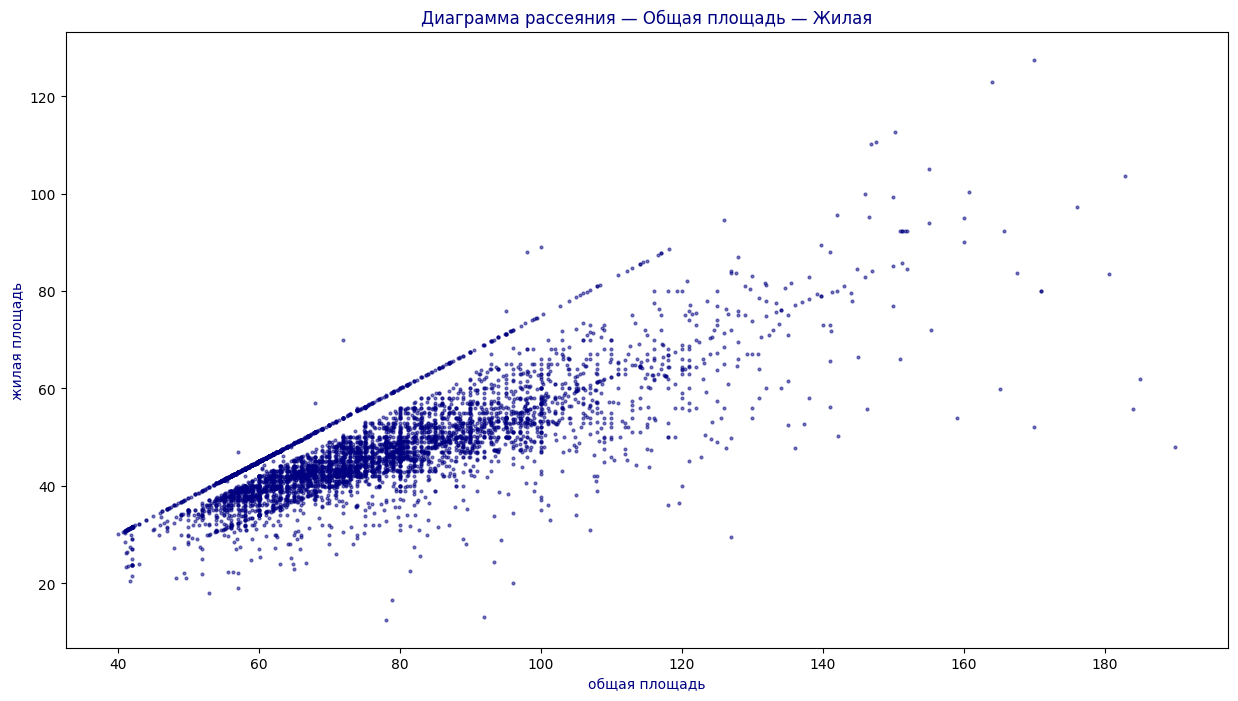

In [63]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'navy', s = 4, 
                                                                                   legend=False)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая', color='navy')
plt.xlabel('общая площадь', color='navy')
plt.ylabel('жилая площадь', color='navy')
plt.show();

### Гео-данные

<font color='DarkBlue'><i>Пропуски в данных о расстоянии до центра города, аэропорта, ближайшего парка и водоема, а также количество парков и водоемомв в радиусе 3 км. заменим медианным значением для соответсвующего населенного пункта

In [66]:
zero_parametr_mediana('city_centers_nearest')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['city_centers_nearest'].isna().sum(), data['city_centers_nearest'].isna().sum() / data.shape[0]))

В датасете осталось 5449 записей (или 23.09%) с пропуском информации о жилой площади


In [67]:
zero_parametr_mediana('airports_nearest')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['airports_nearest'].isna().sum(), data['airports_nearest'].isna().sum() / data.shape[0]))

В датасете осталось 5472 записей (или 23.19%) с пропуском информации о жилой площади


In [68]:
zero_parametr_mediana('parks_nearest')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['parks_nearest'].isna().sum(), data['parks_nearest'].isna().sum() / data.shape[0]))

В датасете осталось 15531 записей (или 65.82%) с пропуском информации о жилой площади


In [69]:
zero_parametr_mediana('ponds_nearest')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['ponds_nearest'].isna().sum(), data['ponds_nearest'].isna().sum() / data.shape[0]))

В датасете осталось 14500 записей (или 61.45%) с пропуском информации о жилой площади


In [70]:
zero_parametr_mediana('parks_around3000')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['parks_around3000'].isna().sum(), data['parks_around3000'].isna().sum() / data.shape[0]))

В датасете осталось 5448 записей (или 23.09%) с пропуском информации о жилой площади


In [71]:
zero_parametr_mediana('ponds_around3000')
print('В датасете осталось {} записей (или {:.2%}) с пропуском информации о жилой площади' \
      .format(data['ponds_around3000'].isna().sum(), data['ponds_around3000'].isna().sum() / data.shape[0]))

В датасете осталось 5448 записей (или 23.09%) с пропуском информации о жилой площади


<font color='DarkBlue'><i>Оставшиеся незаполненные ячейки, по-видимому, относятся к объектам в населенных пунктах, для которых отсутствует указание близости к аэропортам, паркам и водоемам, а также расстоянию до центра города

### Тип данных

<font color='DarkBlue'><i>Рассмотрим тип данных и скорректируем его там, где это целесообразно

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23597 entries, 10132 to 15072
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23597 non-null  int64  
 1   last_price            23597 non-null  float64
 2   total_area            23597 non-null  float64
 3   first_day_exposition  23597 non-null  object 
 4   rooms                 23597 non-null  int64  
 5   ceiling_height        14445 non-null  float64
 6   floors_total          23511 non-null  float64
 7   living_area           23581 non-null  float64
 8   floor                 23597 non-null  int64  
 9   is_apartment          23597 non-null  bool   
 10  studio                23597 non-null  bool   
 11  open_plan             23597 non-null  bool   
 12  kitchen_area          21330 non-null  float64
 13  balcony               23597 non-null  float64
 14  locality_name         23597 non-null  object 
 15  airports_nearest    

<font color='DarkBlue'><i>Из представленных выше данных видно, что необходимо скорретировать формат данных в колонках:<br>- `first_day_exposition` c object на datetime64 - так как это данные о дате размещения<br>- `floors_total`, `floors_total_new`, `balcony` с float64 на int64 - так как это данные, которые отражаются целочисленными значениями, не может быть 1,5 балкона или 6,3 этажа в доме

In [77]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [78]:
def data_type(column_name):
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce').astype('Int64')
    return data.dtypes[column_name] 

In [79]:
data_type('balcony')

Int64Dtype()

In [80]:
data_type('floors_total')

Int64Dtype()

In [81]:
data_type('floors_total_new')

Int64Dtype()

### Резюме

<font color='DarkBlue'>Причинами пропусков данных в предоставленных данных в бОльшей степени не случайны, так например, отсутствие значительного количества гео-данных говорит о недоработке программного продукта, автоматически определяющего геопозицию и расстояния, отсутствие данных о балконах и категории "апартамент" говорит о том, что при формировании объявления пользователи пропускали соответсвующие окна в случаях отсутвия/непринадлежности к данной категории объекта.

<font color='DarkBlue'>Наибольшее количество пропусков было выявлено в гео-данных (более 23% по расстояниям до праков и водоемомв, центра и аэропорта и более 63% по количеству парков и водоемов). Статистическими методами количество пропусков было снижено до ~20%. Дальнейшая обработка пропусков в данной категории данных математичесвими методами не представляется возможной. Заполенение пропусков возможно только дополнительным сбором данных. Поэтому в рамках анализа данных, например зависимости стоимости квадратного метра от близости объекта к аэропорту, центру города, праку или водоему, группу данных с пропущенными значениями надо выделять и анализировать на предмет влияния отсутсвия/наличия этих данных на скорость и стоимость продажи объекта

<font color='DarkBlue'>Существенным также было наличие пропусков в данных о принадлежности объекта к группе - апартаменты. Эти пропуски были полностью устранены исходя из предположения, что, по умолчанию (пропуск в данных), объект не является апартаментом.

## Создание дополнительных признаков

<font color='DarkBlue'><i>Добавим в таблицу колонку 'цена за 1м2'- 'price_per_m2'. Расчет основывается на стоимости на момент снятия жилья с публикации и его общей площади.

In [88]:
data['price_per_m2'] = round((data['last_price'] / data['total_area']), 2)

<font color='DarkBlue'><i>Добавим в таблицу колонку 'день недели публикации'- 'expo_week_day'

In [90]:
data['expo_week_day'] = data['first_day_exposition'].dt.weekday

<font color='DarkBlue'><i>Добавим в таблицу колонку 'месяц публикации'- 'expo_month'

In [92]:
data['expo_month'] = data['first_day_exposition'].dt.month 

<font color='DarkBlue'><i>Добавим в таблицу колонку 'год публикации'- 'expo_year'

In [94]:
data['expo_year'] = data['first_day_exposition'].dt.year 

<font color='DarkBlue'><i>Добавим в таблицу колонку `тип этажа квартиры`(первый, последний или другой) - `floor_type`

In [96]:
def floor_type(row):
    try:
        if row['floor'] <= 0:
            return 'ошибка в номере этажа'
        if row['floor'] == 1:
            return 'первый этаж'
        elif row['floor'] < row['floors_total_new']:
            return 'другой этаж'
        return 'последний этаж'
    except:
        pass

In [97]:
data['floor_type'] = data.apply(floor_type, axis=1)
data['floor_type'].unique()

array(['последний этаж', 'первый этаж', 'другой этаж'], dtype=object)

<font color='DarkBlue'><i>Добавим в таблицу колонку `расстояние до центра города, км'- `cityCenter_km`

In [99]:
data['city_center_km'] = round((data['city_centers_nearest'] / 1000))

<font color='DarkBlue'><i>Для удобства дальнейшего анализа: Округлим значения данных о жилой площади до 1 знака после запятой и Переведем цену объекта в тысячи

In [101]:
data['living_area'] = round(data['living_area'], 1)

In [102]:
data['last_price_thds'] = data['last_price'] / 1000

In [103]:
data['price_per_m2_thds'] = data['price_per_m2'] / 1000

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23597 entries, 10132 to 15072
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23597 non-null  int64         
 1   last_price            23597 non-null  float64       
 2   total_area            23597 non-null  float64       
 3   first_day_exposition  23597 non-null  datetime64[ns]
 4   rooms                 23597 non-null  int64         
 5   ceiling_height        14445 non-null  float64       
 6   floors_total          23511 non-null  Int64         
 7   living_area           23581 non-null  float64       
 8   floor                 23597 non-null  int64         
 9   is_apartment          23597 non-null  bool          
 10  studio                23597 non-null  bool          
 11  open_plan             23597 non-null  bool          
 12  kitchen_area          21330 non-null  float64       
 13  balcony          

## Исследовательский анализ данных

<font color='DarkBlue'><i> Проведём анализ ключевых набор характеристик объектов жилой недвижимости<br>1. Общая площадь<br>2.Жилая площадь<br>3. Пплощадь кухни<br>4. Цена объекта<br> 5. Количество комнат<br>6. Высота потолков<br>7. Тип этажа квартиры («первый», «последний», «другой»)<br>8. Общее количество этажей в доме<br>9. Расстояние до центра города в метрах<br>10. Расстояние до ближайшего парка<br>А также посмотрим на динамику размещения объявлений

### Дата размещения объявления

In [108]:
data['first_day_exposition'].describe()

count                            23597
mean     2017-11-09 04:28:23.199559424
min                2014-11-27 00:00:00
25%                2017-05-13 00:00:00
50%                2017-12-12 00:00:00
75%                2018-08-27 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

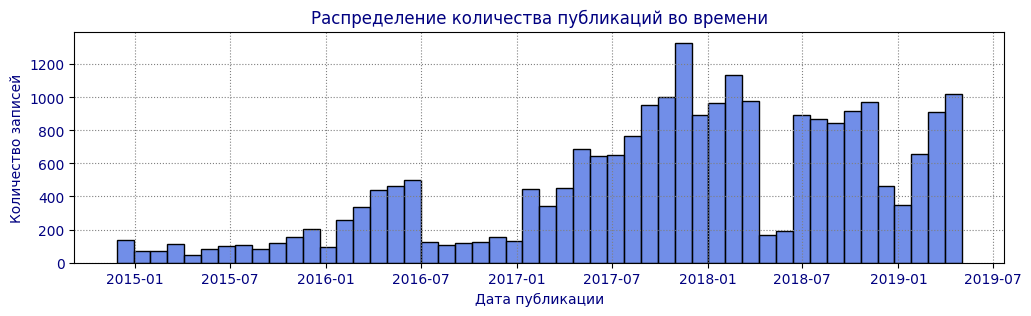

In [109]:
plt.figure(figsize=(12, 3))
sns.histplot(data=data, x='first_day_exposition', color='royalblue')
plt.xlabel('Дата публикации', color='navy')
plt.xticks(color='navy')
plt.ylabel('Количество записей', color='navy')
plt.yticks(color='navy')
plt.title('Распределение количества публикаций во времени', color='navy')
plt.grid(color='grey', ls=':');

<font color='DarkBlue'><i>Публикации осуществлялись в период с 27 Ноября 2014 по 3 Мая 2019 года. Наибольшее количество публикаций пришлось на конец 2017 года

### Общая площадь

In [112]:
data['total_area'].describe(percentiles=[0.005, 0.5, 0.995])

count    23597.000000
mean        60.360100
std         35.646384
min         12.000000
0.5%        23.500000
50%         52.000000
99.5%      248.706000
max        900.000000
Name: total_area, dtype: float64

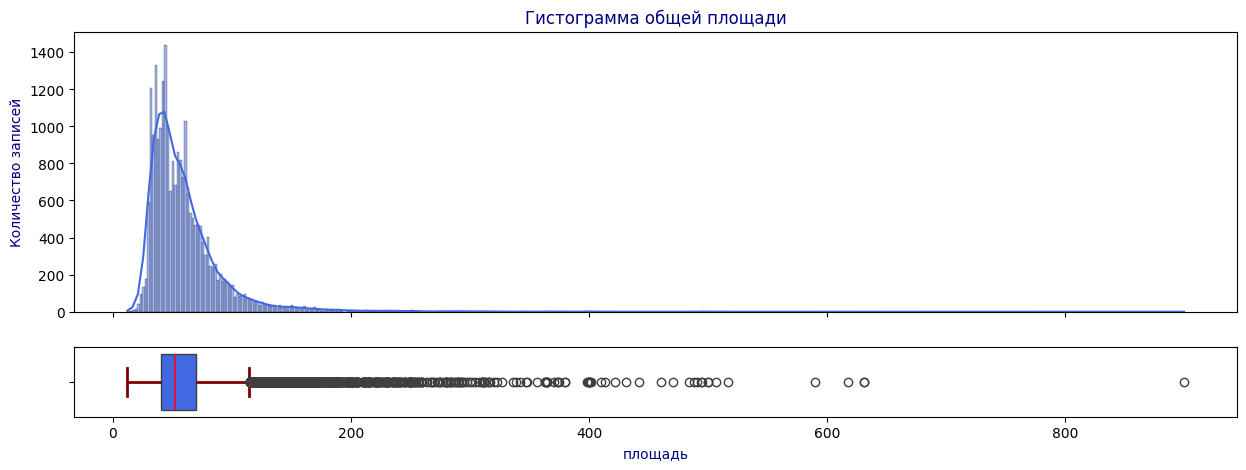

In [113]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='total_area', kde=True, 
             color='royalblue', ax=axs_hist)
axs_hist.set_title('Гистограмма общей площади', color='navy') 
axs_hist.set_ylabel('Количество записей', color='navy')
sns.boxplot(data=data, x='total_area', 
             boxprops = dict(facecolor = "royalblue"), \
             medianprops = dict(color = "crimson", linewidth = 1.5), \
             capprops = dict(color = "maroon", linewidth = 2), \
            whiskerprops = dict(color = "maroon", linewidth = 2), \
            ax=axs_box)
axs_box.set_xlabel('площадь', color='navy');

<font color='DarkBlue'><i>Оценим количество квартир с аномально большой и аномально малой площадью

In [115]:
data.query('total_area > 200 or total_area < 16')['total_area'].count()

235

<font color='DarkBlue'><i>С учетом того, что количество объектов с аномальным значением общей площади составляет 1% удалим такие данные.

In [117]:
data = data.query('16 <= total_area <= 200')
data['total_area'].describe()

count    23362.000000
mean        58.209365
std         26.512692
min         16.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

<font color='DarkBlue'><i>Ограничив диапазон рассматриваемых данных значениями от 35 до 110 м2, сохранив при этом высокую репрезентативность выборки (в выборку попадает 80% данных), можно увидиеть незначительно снижение показателя средней площади с 60,3 до 58,0 м2, и существенное (в 2,0 раза) сокращение показателя стандартного отклонения

In [119]:
data.query('35 <= total_area <= 110')['total_area'].describe()

count    18991.000000
mean        57.976269
std         17.608275
min         35.000000
25%         44.000000
50%         54.600000
75%         68.500000
max        110.000000
Name: total_area, dtype: float64

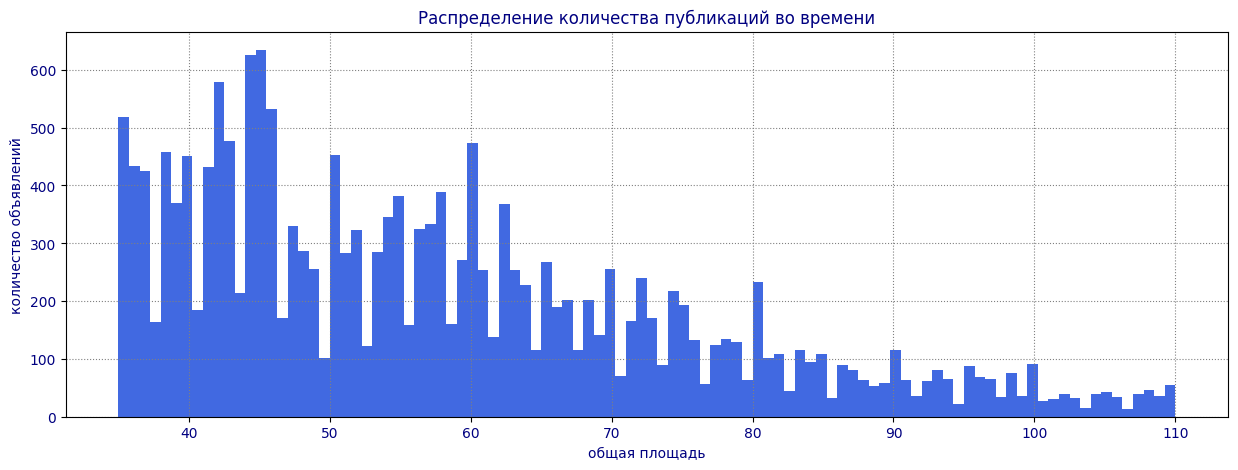

In [120]:
data.query('35 <= total_area <= 110')['total_area'].hist(bins=100, range=(35, 110), color='royalblue', figsize=(15,5))
plt.title("Зависимость предложения объектов от размера общей площади", color='navy')
plt.xlabel("общая площадь", color='navy')
plt.xticks(color='navy')
plt.ylabel('количество объявлений', color='navy')
plt.yticks(color='navy')
plt.title('Распределение количества публикаций во времени', color='navy')
plt.grid(color='grey', ls=':');

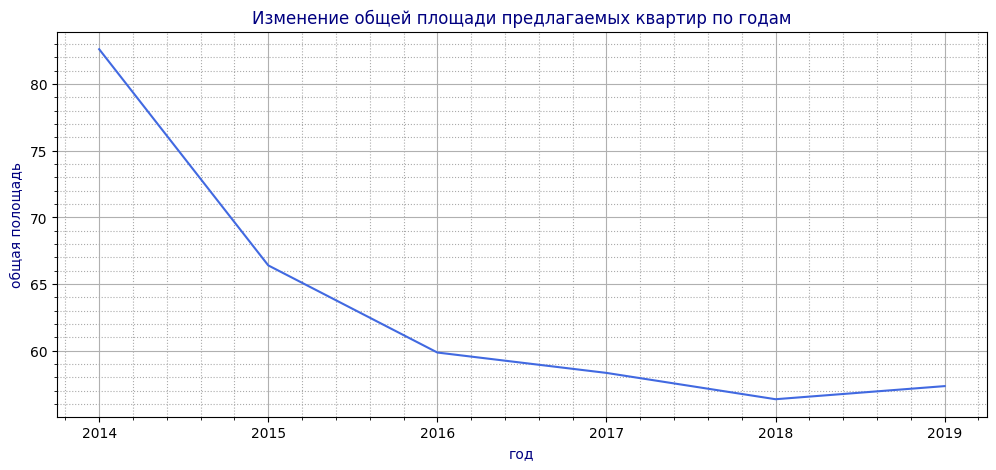

In [121]:
data.pivot_table(index='expo_year', values='total_area').plot(grid=True, style='-', color='royalblue', 
                                                              legend=False, figsize=(12, 5))
plt.title("Изменение общей площади предлагаемых квартир по годам", color='navy')
plt.xlabel("год", color='navy')
plt.ylabel("общая полощадь", color='navy')
plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

<font color='DarkBlue'><b>Вывод:</b><br>- На рынке в основном представлены объекты жилой недвижимомсти общей площадью от 35 до 110 м2, медианное значение общей площади составляет 52 м2, наибольшее количесвто объявлений содержит объекты с общей площадью 45 м2<br>- Динамика изменения площади предлагаемых квартир отражает устойчивую тенеденцию к снижения площади с 62 м2 в 2015 году до 52 м2 в 2019 году

### Жилая площадь

In [124]:
data['living_area'].describe(percentiles=[0.005, 0.5, 0.995])

count    23347.000000
mean        33.380310
std         17.368097
min          2.000000
0.5%        11.300000
50%         30.000000
99.5%      109.000000
max        148.500000
Name: living_area, dtype: float64

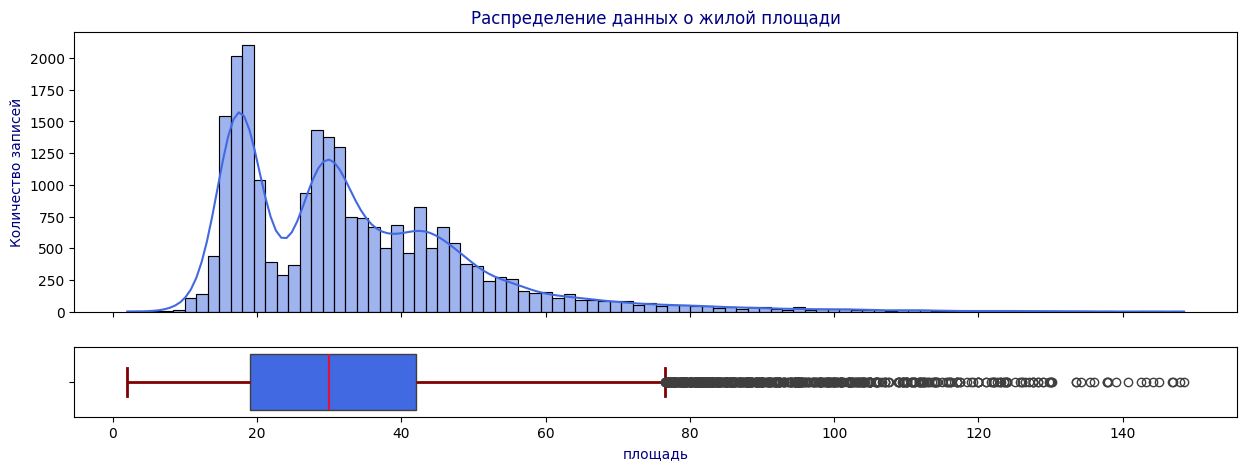

In [125]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='living_area', kde=True, 
             color='royalblue', ax=axs_hist)
axs_hist.set_title('Распределение данных о жилой площади', color='navy') 
axs_hist.set_ylabel('Количество записей', color='navy')
sns.boxplot(data=data, x='living_area', 
             boxprops = dict(facecolor = "royalblue"), \
             medianprops = dict(color = "crimson", linewidth = 1.5), \
             capprops = dict(color = "maroon", linewidth = 2), \
            whiskerprops = dict(color = "maroon", linewidth = 2), \
            ax=axs_box)
axs_box.set_xlabel('площадь', color='navy');

<font color='DarkBlue'><i>Оценим количество квартир с аномально большой и аномально малой жилой площадью

In [127]:
data.query('living_area < 12')['living_area'].count()

146

<font color='DarkBlue'><i>С учетом того, что количество объектов с аномально-малым значением жилой площади составляет менее 1% удалим такие данные.

In [129]:
data = data.query('living_area >= 12')

In [130]:
data['living_area'].describe(percentiles=[0.025, 0.5, 0.975])

count    23201.000000
mean        33.526158
std         17.324211
min         12.000000
2.5%        14.800000
50%         30.000000
97.5%       80.000000
max        148.500000
Name: living_area, dtype: float64

In [131]:
data.query('15 <= living_area <= 45')['living_area'].describe()

count    18081.000000
mean        27.422781
std          8.926815
min         15.000000
25%         18.200000
50%         28.000000
75%         34.000000
max         45.000000
Name: living_area, dtype: float64

<font color='DarkBlue'><i>Ограничив диапазон рассматриваемых данных значениями от 15 до 45 м2, сохранивв при этом высокую репрезентативность выборки, можно увидиеть 20%-снижение показателя средней площади с 34,6 до 27,4 м2, и существенное(в 2,5 раза) сокращение показателя стандартного отклонения

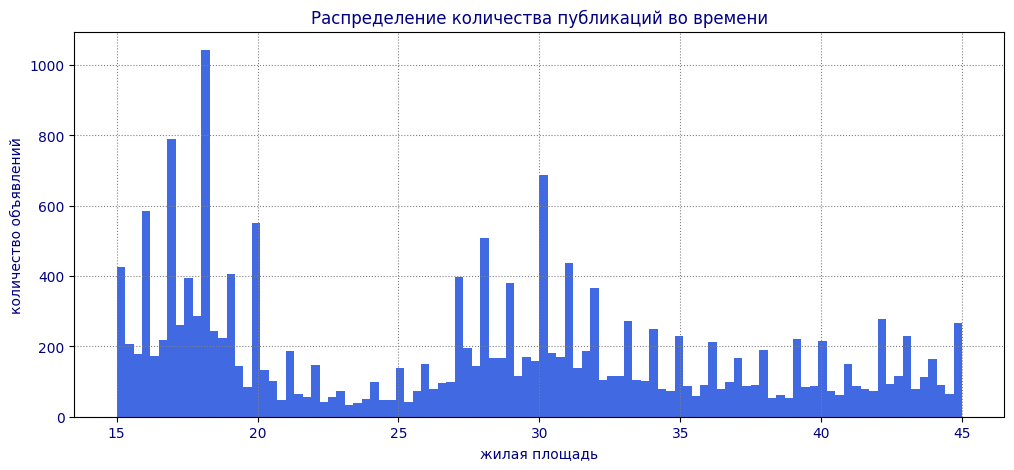

In [133]:
data.query('15 <= living_area <= 45')['living_area'].hist(bins=100, range=(15,45), \
                                                          color='royalblue', figsize=(12,5))
plt.title("Зависимость количества предложений объектов от размера жилой площади", color = 'navy')
plt.xlabel("жилая площадь", color = 'navy')
plt.xticks(color='navy')
plt.ylabel('количество объявлений', color='navy')
plt.yticks(color='navy')
plt.title('Распределение количества публикаций во времени', color='navy')
plt.grid(color='grey', ls=':');

<font color='DarkBlue'><b>Вывод:</b> На рынке в основном представлены объекты жилой недвижимомсти с жилой площадью от 15 до 45 м2, медианное значение жилой площади составляет 30 м2, наибольшее количесвто объявлений содержит объекты с жилой площадью 15-20 м2

### Площадь кухни

In [136]:
data['kitchen_area_new'].describe()

count    21030.000000
mean        11.649075
std          5.576527
min          2.550000
25%          8.000000
50%         10.040000
75%         13.800000
max         93.200000
Name: kitchen_area_new, dtype: float64

<font color='DarkBlue'><i>Оценим количесвто квартир с аномально большой и аномально малой площадью кухни

In [138]:
data.query('kitchen_area_new > 35 or kitchen_area_new < 5')['kitchen_area_new'].count()

207

<font color='DarkBlue'><i>С учетом того, что количество объектов с аномальным значением жилой площади составляет 1% удалим такие данные.

In [140]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23201 entries, 10132 to 15072
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23201 non-null  int64         
 1   last_price            23201 non-null  float64       
 2   total_area            23201 non-null  float64       
 3   first_day_exposition  23201 non-null  datetime64[ns]
 4   rooms                 23201 non-null  int64         
 5   ceiling_height        14225 non-null  float64       
 6   floors_total          23125 non-null  Int64         
 7   living_area           23201 non-null  float64       
 8   floor                 23201 non-null  int64         
 9   is_apartment          23201 non-null  bool          
 10  studio                23201 non-null  bool          
 11  open_plan             23201 non-null  bool          
 12  kitchen_area          21030 non-null  float64       
 13  balcony          

In [141]:
data = data.loc[((data['kitchen_area'] <= 35) | (data['kitchen_area'].isna()))]
data = data.loc[((data['kitchen_area'] >= 5) | (data['kitchen_area'].isna()))]

In [142]:
# check
data.shape[0]

22933

In [143]:
data['kitchen_area_new'].describe()

count    20762.000000
mean        11.495822
std          5.108091
min          3.100500
25%          8.000000
50%         10.000000
75%         13.660000
max         40.000000
Name: kitchen_area_new, dtype: float64

In [144]:
data.query('8 <= kitchen_area_new <= 40')['kitchen_area_new'].describe()

count    15634.000000
mean        13.026824
std          5.002266
min          8.000000
25%          9.220000
50%         11.600000
75%         14.980000
max         40.000000
Name: kitchen_area_new, dtype: float64

<font color='DarkBlue'><i>Ограничив диапазон рассматриваемых данных значениями от 8 до 40 м2, сохранивв при этом высокую репрезентативность выборки (80% данных), получаем следующие изменения статитстических данных:<br>- снижение на 30% средней с 17.6 до 12.9 м2<br>- снижение на 30% медианы с 15.3 2 до 11.6 м2<br>-  более чем духкратное падение показателя стандартного отклонения с 11.2 до 4.8 м2

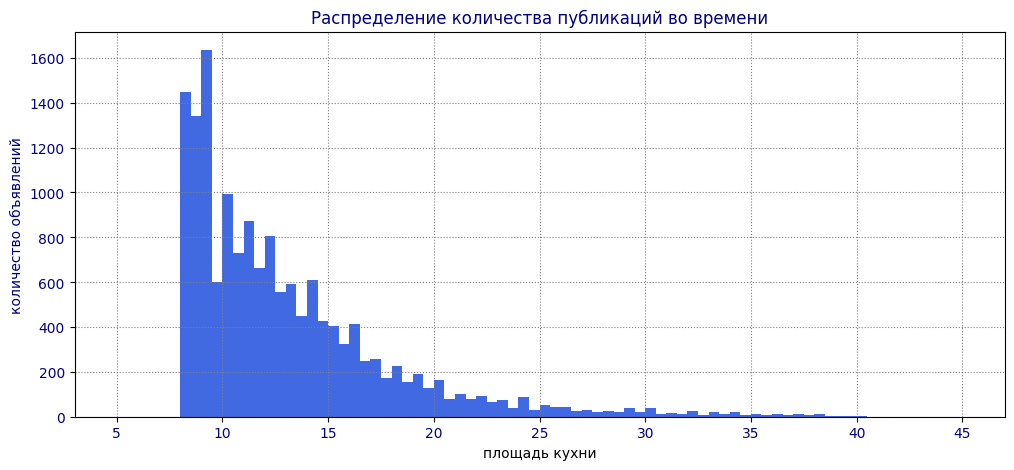

In [146]:
data.query('8 <= kitchen_area_new <= 40')['kitchen_area_new'].hist(bins=80, range=(5,45), color='royalblue', figsize=(12,5))
plt.title("Зависимость количества предложений объектов от размера кухни", color='navy')
plt.xlabel("площадь кухни")
plt.xticks(color='navy')
plt.ylabel('количество объявлений', color='navy')
plt.yticks(color='navy')
plt.title('Распределение количества публикаций во времени', color='navy')
plt.grid(color='grey', ls=':');

<font color='DarkBlue'><b>Вывод:</b> На рынке в основном представлены объекты жилой недвижимомсти с кухнями от 8 до 40 м2, медианное значение площади кухни составляет 10.0 м2, наибольшее количесвто объявлений содержит объекты с кухнями площадью от 10 до 20 м2

### Цена объекта

In [149]:
data['last_price_thds'].describe(percentiles=[0.025, 0.5, 0.975])

count     22933.000000
mean       5921.680687
std        5513.531499
min         430.000000
2.5%       1450.000000
50%        4600.000000
97.5%     18000.000000
max      289238.400000
Name: last_price_thds, dtype: float64

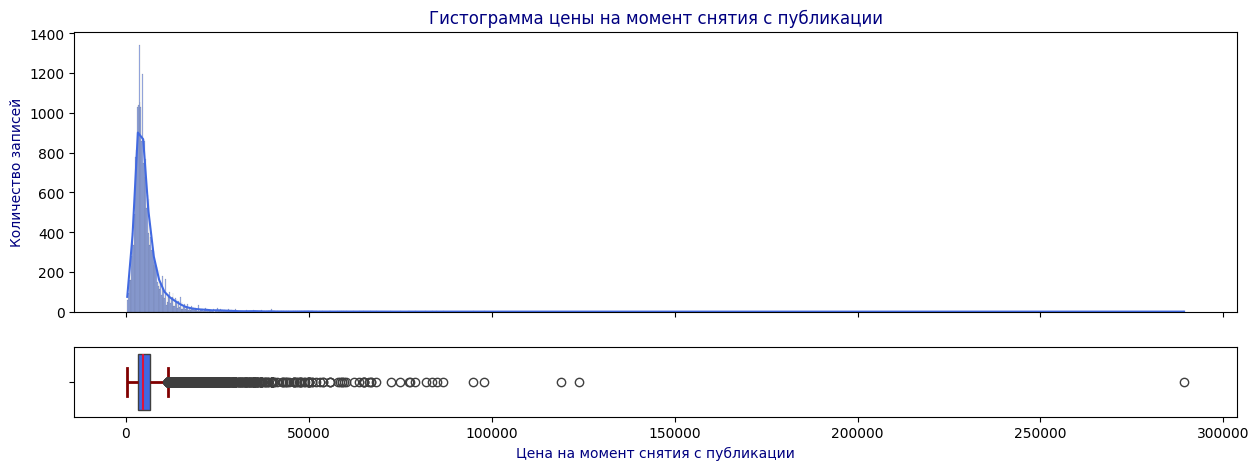

In [150]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='last_price_thds', kde=True, 
             color='royalblue', ax=axs_hist)
axs_hist.set_title('Гистограмма цены на момент снятия с публикации', color='navy') 
axs_hist.set_ylabel('Количество записей', color='navy')
sns.boxplot(data=data, 
             x='last_price_thds', 
             boxprops = dict(facecolor = "royalblue"), \
             medianprops = dict(color = "crimson", linewidth = 1.5), \
             capprops = dict(color = "maroon", linewidth = 2), \
            whiskerprops = dict(color = "maroon", linewidth = 2), \
            ax=axs_box)
axs_box.set_xlabel('Цена на момент снятия с публикации', color='navy');

<font color='DarkBlue'><i>Оценим количество квартир с аномально большой и аномально малой ценой

In [152]:
data.query('last_price_thds > 50000 or last_price_thds < 500')['last_price_thds'].count()

51

<font color='DarkBlue'><i>С учетом того, что количество объектов с аномальным значением стоимости представляется несущественным, удалим такие данные.

In [154]:
data = data.query('500 <= last_price_thds <= 500000')
data['last_price_thds'].describe()

count     22921.000000
mean       5924.540081
std        5513.557757
min         500.000000
25%        3450.000000
50%        4600.000000
75%        6650.000000
max      289238.400000
Name: last_price_thds, dtype: float64

<font color='DarkBlue'><i>Ограничив диапазон анализа реперзентативной выборкой 80% объявлений в диапазоне цены от 2,0 до 9 млн. рублей получили 40%- снижение средней стоимости с 6,5 до 4,7 млн и почти 7-кратное снижение стандартного отклонения, что говорит о существенном сокращении колебаний цены в пределах диапазона

In [156]:
data.query('2000 <= last_price_thds <=9000')['last_price_thds'].describe()

count    18702.000000
mean      4736.944551
std       1647.991461
min       2000.000000
25%       3500.000000
50%       4450.000000
75%       5800.000000
max       9000.000000
Name: last_price_thds, dtype: float64

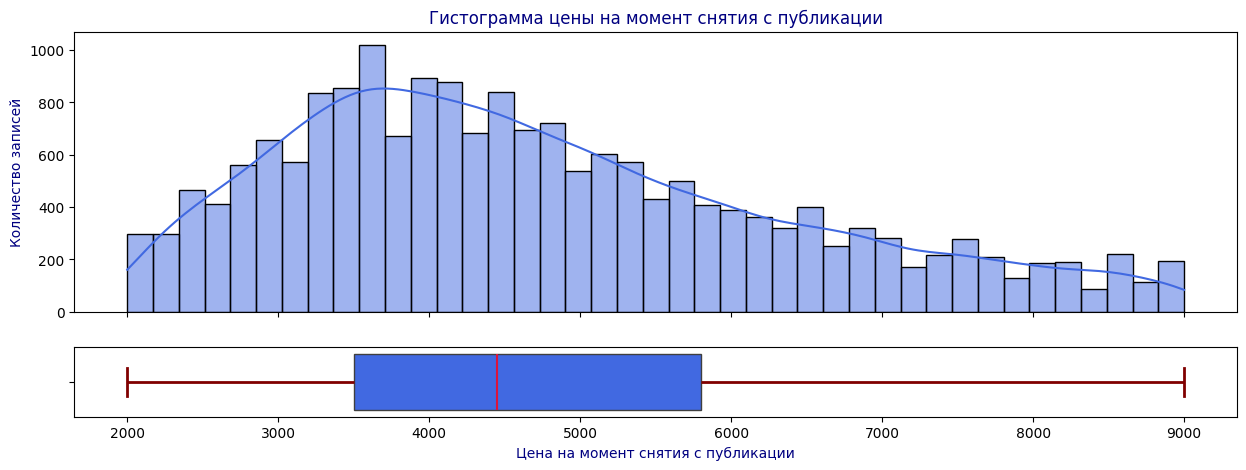

In [157]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data.query('2000 <= last_price_thds <=9000'), x='last_price_thds', kde=True, 
             color='royalblue', ax=axs_hist)
axs_hist.set_title('Гистограмма цены на момент снятия с публикации', color='navy') 
axs_hist.set_ylabel('Количество записей', color='navy')
sns.boxplot(data=data.query('2000 <= last_price_thds <=9000'), 
             x='last_price_thds', 
             boxprops = dict(facecolor = "royalblue"), \
             medianprops = dict(color = "crimson", linewidth = 1.5), \
             capprops = dict(color = "maroon", linewidth = 2), \
            whiskerprops = dict(color = "maroon", linewidth = 2), \
            ax=axs_box)
axs_box.set_xlabel('Цена на момент снятия с публикации', color='navy');

<font color='DarkBlue'><b>Вывод:</b> На рынке в основном представлены объекты жилой недвижимомсти стоимостью от 2,0 до 9,0 млн руб., медианная цена объектов - 4,45 млн руб., наибольшее количесвто объявлений с объектами стоимостью от 3,5 до 5,8 млн руб.

### Количество комнат

In [160]:
data['rooms'].describe()

count    22921.000000
mean         2.038349
std          0.995174
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<font color='DarkBlue'><i>Оценим и удалим количество квартир с аномально большим количеством комнат

In [162]:
data.query('rooms >= 6')['rooms'].count()

86

In [163]:
data = data.loc[data.loc[:, 'rooms'] <= 6]
data.query('rooms > 6')['last_price_thds'].count()

0

In [164]:
data.groupby('rooms')['locality_name'].count()

rooms
0     187
1    7804
2    7793
3    5683
4    1108
5     260
6      62
Name: locality_name, dtype: int64

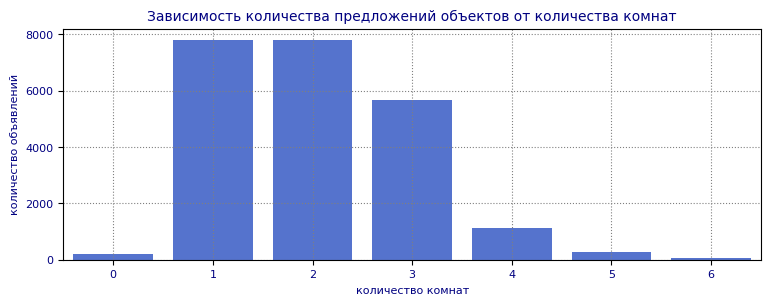

In [165]:
plt.figure(figsize=(9, 3))
sns.countplot(x='rooms', data=data, color='royalblue')
plt.title("Зависимость количества предложений объектов от количества комнат", color='navy', fontsize=10)
plt.xlabel("количество комнат", color='navy', fontsize=8)
plt.xticks(color='navy', fontsize=8)
plt.ylabel("количество объявлений", color='navy', fontsize=8)
plt.yticks(color='navy', fontsize=8)
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Вывод:</b> Из представленных выше аналитик и гистрограммы следует, что к продаже предлагаются в основном 1- и 2-комнатные квартиры - 67,5% предложений (что, в принципе, коррелирует с выше рассчитанными показателями жилой и общей площадями наиболее популярных объявлений)

### Высота потолков

In [168]:
data['ceiling_height'].describe()

count    14021.000000
mean         2.719764
std          0.307978
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

<font color='DarkBlue'><i>Оценим и удалим количеcтво квартир с аномально высокими и аномально низкими потолками

In [170]:
data.query('ceiling_height > 5 or ceiling_height < 2.1')['ceiling_height'].count()

26

In [171]:
# check
data.shape[0]

22897

In [172]:
data = data.loc[((data['ceiling_height'] <= 5) | (data['ceiling_height'].isna()))]
data = data.loc[((data['ceiling_height'] >= 2.1) | (data['ceiling_height'].isna()))]

In [173]:
# check
data.shape[0]

22871

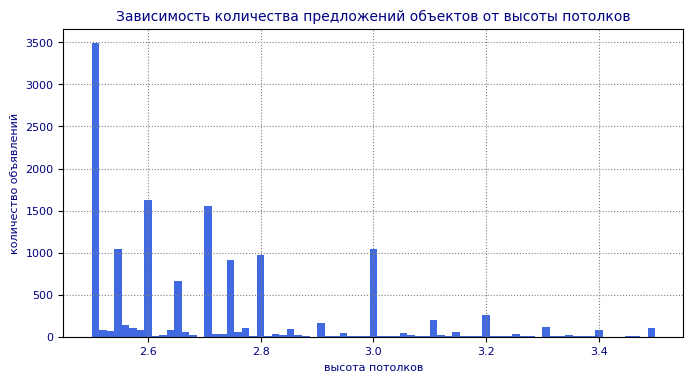

In [174]:
data['ceiling_height'].hist(bins=75, range=(2.5,3.5), figsize=(8, 4), 
                            color='royalblue')
plt.title("Зависимость количества предложений объектов от высоты потолков", color='navy', fontsize=10)
plt.xlabel("высота потолков", color='navy', fontsize=8)
plt.xticks(color='navy', fontsize=8)
plt.ylabel("количество объявлений", color='navy', fontsize=8)
plt.yticks(color='navy', fontsize=8)
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Вывод:</b>  Медиана 2,65 м и Средняя 2,73 м данных о высоте потолков, а также низкое значение стандартного отклонения (0,3 м) подтвреждают очевидное - основное предложение квартир - это квартиры с высотой потолков от 2,5 до 2,8 м, что соответсвует современным стандратам строительства по региону.

### Тип этажа

In [177]:
data.groupby('floor_type')['locality_name'].count()

floor_type
другой этаж       16833
первый этаж        2813
последний этаж     3225
Name: locality_name, dtype: int64

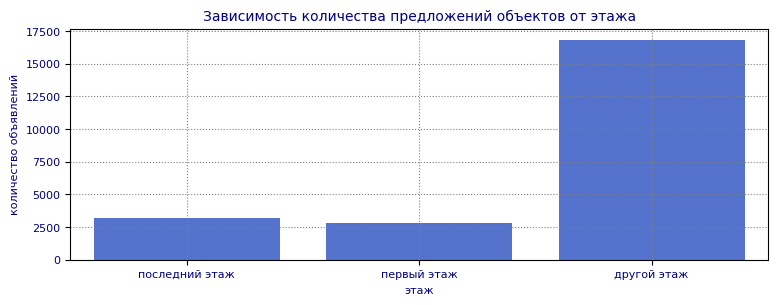

In [178]:
plt.figure(figsize=(9, 3))
sns.countplot(x='floor_type', data=data, color='royalblue')
plt.title("Зависимость количества предложений объектов от этажа", color='navy', fontsize=10)
plt.xlabel("этаж", color='navy', fontsize=8)
plt.xticks(color='navy', fontsize=8)
plt.ylabel("количество объявлений", color='navy', fontsize=8)
plt.yticks(color='navy', fontsize=8)
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Вывод:</b> Данные, сгруппированные по типу этажа, свидетельствуют о непопулярности предложения квартир на первом или последнем этаже  

### Общее количество этажей в доме

In [181]:
data['floors_total_new'].describe()

count     22871.0
mean     10.74295
std      6.592657
min           1.0
25%           5.0
50%           9.0
75%          16.0
max          60.0
Name: floors_total_new, dtype: Float64

In [182]:
data = data.loc[((data['floors_total_new'] <= 30) | (data['floors_total_new'].isna()))]
data.shape[0]

22841

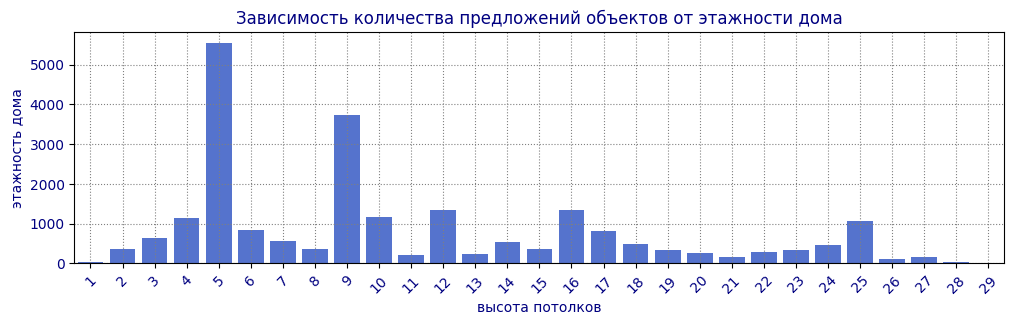

In [183]:
plt.figure(figsize=(12,3))
sns.countplot(data=data, x='floors_total_new', color='royalblue')
plt.title("Зависимость количества предложений объектов от этажности дома", color='navy')
plt.xlabel("высота потолков", color='navy')
plt.xticks(rotation = 45, color='navy')
plt.ylabel("этажность дома", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Вывод:</b> Анализ предложения объектов в разрезе этажности зданий, свидетельствует о наибольшем предложении квартир в 5-ти этажных домах, а также существенной доле предложений в 9ти и 16-ти этажных домах, которые являются характерной для типовой застройки 1960х - 1990х годов.

### Расстояние до центра города

In [186]:
data['city_center_km'].describe()

count    17517.000000
mean        14.301707
std          8.567160
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_center_km, dtype: float64

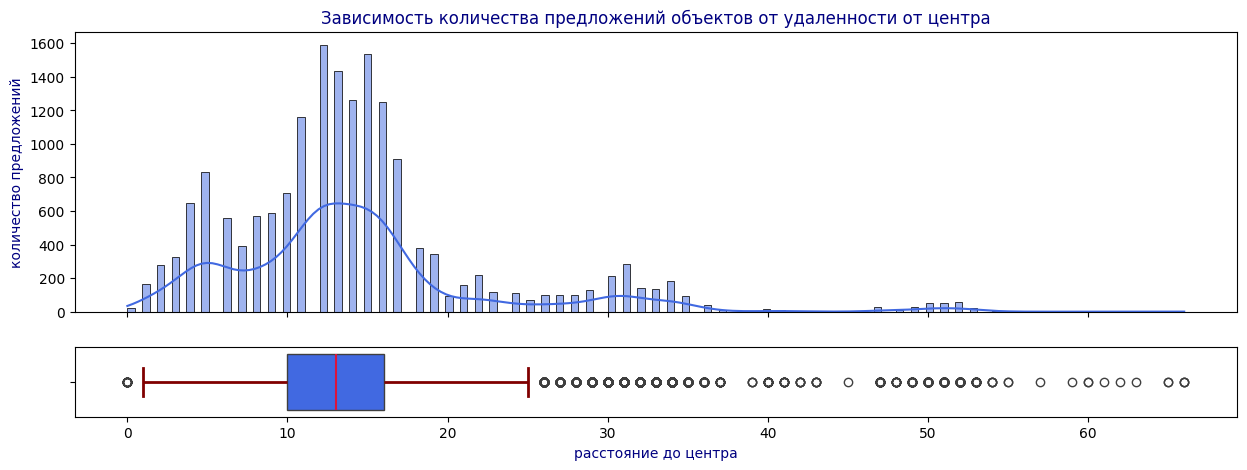

In [187]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='city_center_km', kde=True, 
             color='royalblue', ax=axs_hist)
axs_hist.set_title('Зависимость количества предложений объектов от удаленности от центра', color='navy') 
axs_hist.set_ylabel('количество предложений', color='navy')
sns.boxplot(data=data, 
             x='city_center_km', 
             boxprops = dict(facecolor = "royalblue"), \
             medianprops = dict(color = "crimson", linewidth = 1.5), \
             capprops = dict(color = "maroon", linewidth = 2), \
            whiskerprops = dict(color = "maroon", linewidth = 2), \
            ax=axs_box)
axs_box.set_xlabel('расстояние до центра', color='navy');

<font color='DarkBlue'><b>Вывод:</b> Близость значений медианы (13 км.) и средней (14 км.), видимый пик значений на гистограмме в районе 12,5 - 15,0 км., а также, тот факт, что основная часть предложений квартир - кваритры в Санкт Петербурге, говорит о том, что основное предложение квартир сконцентрировано в спальных районах города.

### Расстояние до ближайшего парка

In [190]:
data['parks_nearest'].describe()

count    7714.000000
mean      492.753695
std       342.020385
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

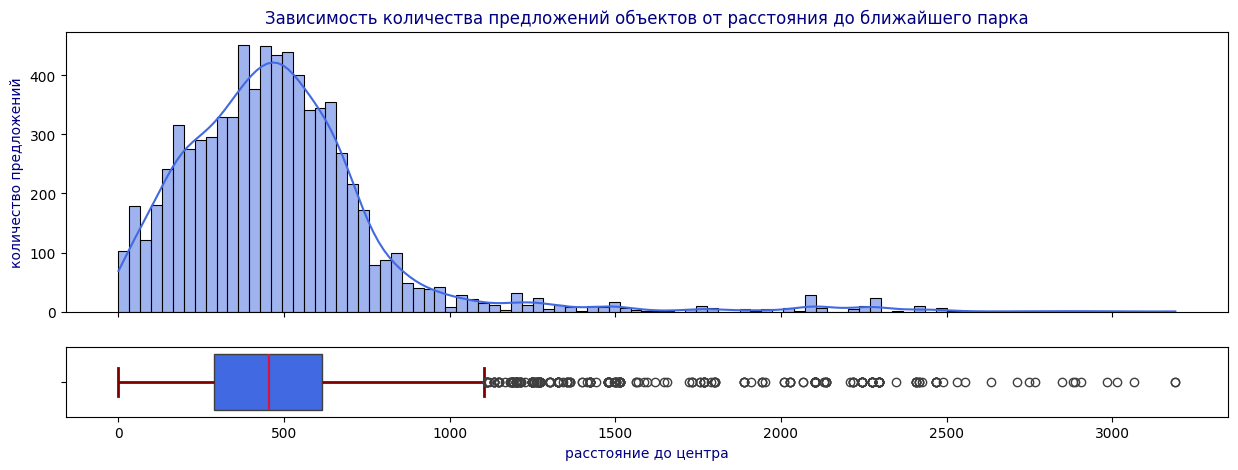

In [191]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='parks_nearest', kde=True, 
             color='royalblue', ax=axs_hist)
axs_hist.set_title('Зависимость количества предложений объектов от расстояния до ближайшего парка', color='navy') 
axs_hist.set_ylabel('количество предложений', color='navy')
sns.boxplot(data=data, 
             x='parks_nearest', 
             boxprops = dict(facecolor = "royalblue"), \
             medianprops = dict(color = "crimson", linewidth = 1.5), \
             capprops = dict(color = "maroon", linewidth = 2), \
            whiskerprops = dict(color = "maroon", linewidth = 2), \
            ax=axs_box)
axs_box.set_xlabel('расстояние до центра', color='navy')
plt.show()

<font color='DarkBlue'><b>Вывод:</b> Учитывая тот факт, что только в 1/3 объявлений отмечено растояние до ближайшего парка, а также анализируя вышепредставленное распределение предложения квартир в зависимости от растояния до ближайшего парка, можно утвреждать, что данный фактор не является основополагающим, влияющим на предложение.

### Анализ скорости продажи квартир

In [194]:
data['days_exposition'].describe()

count    19826.000000
mean       178.998537
std        217.429473
min          1.000000
25%         45.000000
50%         95.000000
75%        228.750000
max       1580.000000
Name: days_exposition, dtype: float64

In [195]:
data['days_exposition'].isna().sum()

3015

In [196]:
data['days_exposition'].describe(percentiles=[0.1, 0.5, 0.99])

count    19826.000000
mean       178.998537
std        217.429473
min          1.000000
10%         17.000000
50%         95.000000
99%       1057.750000
max       1580.000000
Name: days_exposition, dtype: float64

In [197]:
data.query('days_exposition > 1100')['days_exposition'].count()

150

<font color='DarkBlue'><i>Удалим объявления, которые были размещены более 3х лет (1100 дней), так как их доля составляет менее 1%

In [199]:
data = data.loc[((data['days_exposition'] <= 1100) | (data['days_exposition'].isna()))]
data = data.loc[((data['days_exposition'] >= 3) | (data['days_exposition'].isna()))]

In [200]:
data.shape[0]

22687

In [201]:
data['days_exposition'].describe()

count    19672.000000
mean       170.867172
std        196.780362
min          3.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1100.000000
Name: days_exposition, dtype: float64

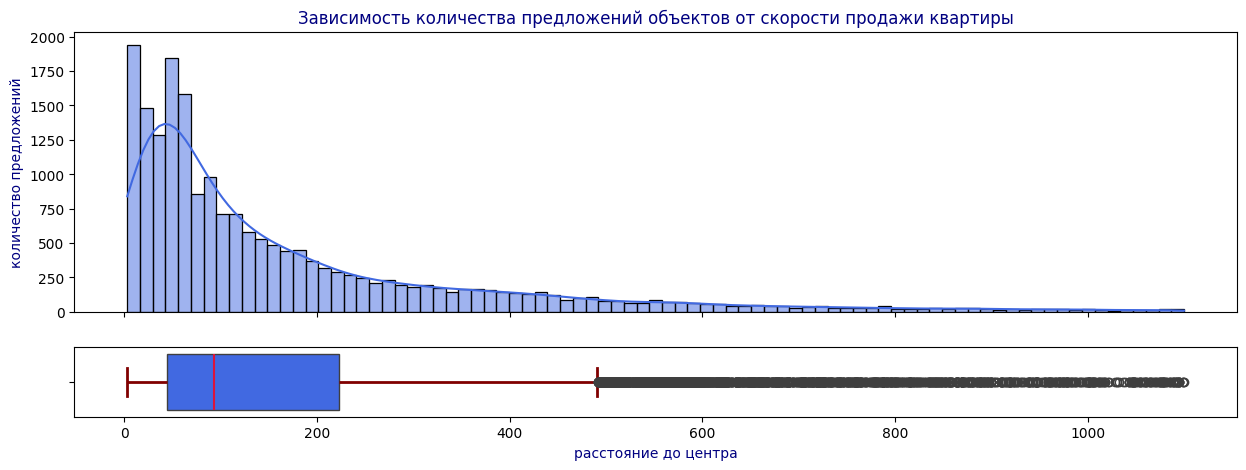

In [202]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='days_exposition', kde=True, 
             color='royalblue', ax=axs_hist)
axs_hist.set_title('Зависимость количества предложений объектов от скорости продажи квартиры', color='navy') 
axs_hist.set_ylabel('количество предложений', color='navy')
sns.boxplot(data=data, 
             x='days_exposition', 
             boxprops = dict(facecolor = "royalblue"), \
             medianprops = dict(color = "crimson", linewidth = 1.5), \
             capprops = dict(color = "maroon", linewidth = 2), \
            whiskerprops = dict(color = "maroon", linewidth = 2), \
            ax=axs_box)
axs_box.set_xlabel('расстояние до центра', color='navy')
plt.show()

<font color='DarkBlue'><i>Посмотрим на изменение средней скорости продаж по годам

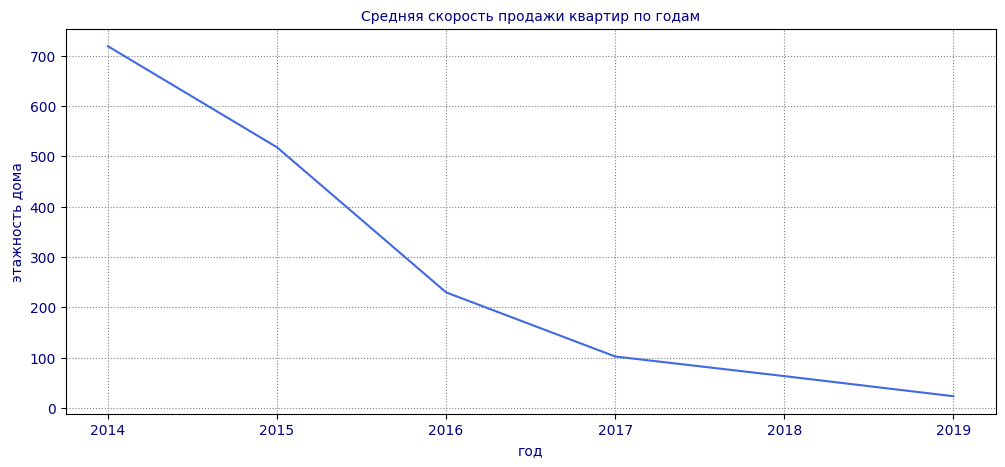

In [204]:
data.pivot_table(index='expo_year', values='days_exposition', aggfunc='median')\
    .plot(
        legend=False, \
        figsize=(12, 5), color='royalblue')
plt.title('Средняя скорость продажи квартир по годам',  color='navy', fontsize=10)
plt.xlabel('год', color = 'navy')
plt.xticks(color='navy')
plt.ylabel("этажность дома", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><i>Посмотрим на изменение средней скорости продажи в зависимости от средней цены объекта

In [206]:
def price_group(last_price_thds):
    if last_price_thds <= 5000:
        return 'до 5 млн руб.'
    elif 5000 < last_price_thds <= 10000:
        return 'от 05 до 10 млн руб.'
    elif 10000 < last_price_thds <= 15000:
        return 'от 10 до 15 млн руб.'
    elif 15000 < last_price_thds <= 20000:
        return 'от 15 до 20 млн руб.'
    elif 20000 < last_price_thds <= 30000:
        return 'от 20 до 30 млн руб.'
    else:
        return 'свыше 30 млн руб.'
data['price_group'] = data['last_price_thds'].apply(price_group)

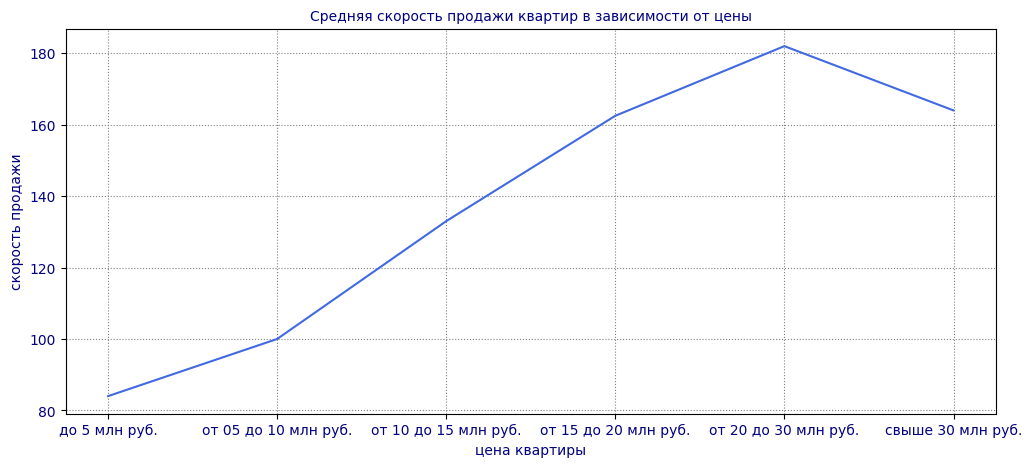

In [207]:
data.pivot_table(index='price_group', values='days_exposition', aggfunc='median')\
    .plot(color='royalblue', legend=False, \
        figsize=(12, 5))
plt.title('Средняя скорость продажи квартир в зависимости от цены',  color='navy', fontsize=10)
plt.xlabel('цена квартиры', color = 'navy')
plt.xticks(color='navy')
plt.ylabel("скорость продажи", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Выводы:</b><br>- После удаления аномально-долго размещенных объявлений средний срок продажи квартиры составил 82 дня. Основная масса квартир продатеся в срок от 1 до 6,5 месяцев. Быстрыми продажами, можно считать продажи, которые состоялись в пределах 1 месяца, тогда как к долгим можно отнести сделки, которые состоялись спустя 7 месяцев с момента размещения объявления<br>- Анализ изменения скорости продаж по годам показал заметную динамику роста средней скорости продаж с 2015 по 2019 годы<br>- Анализ зависимости скорости продажи квартир от цены показал, что наиболее быстро реализуются квариры в ценовом сегменте до 5 млн руб - средняя скорость 1 месяц, дольше всего продаются квартиры в ценовом сегменте от 20 до 30 млн руб - средняя скорость  чуть более полугода.

### Факторы, существенно влияющие на стоимость объекта

<font color='DarkBlue'><i>Рассмотрим влияние площади (общей, жилой и кухни), количества комнат, типа этажа квартиры и дня/месяца/года размещения объявления на стоимость объекта

#### Матрица корреляции для количественных факторов

<font color='DarkBlue'><i>1. Построим матрицу корреляции для числовых данных: площади (общей, жилой и кухни), количества комнат и дня/месяца/года размещения объявления<br>2. Влияние типа этажа квартиры на стоиомсть оценим отдельно, т.к. данные о типе квартиры являются категориальными

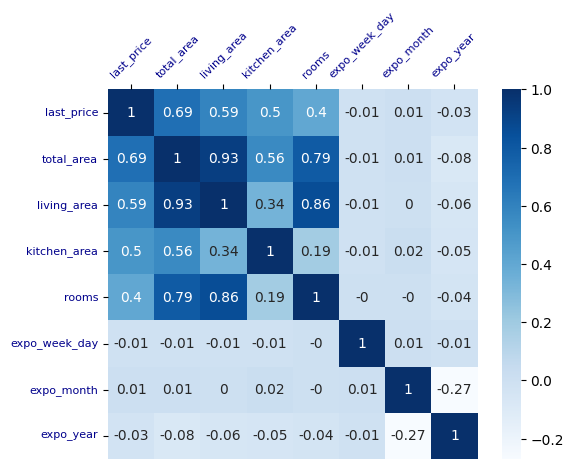

In [213]:
#plt.figure(figsize=[5,5])
ax = sns.heatmap(round(data.loc[:,['last_price', \
            'total_area', \
            'living_area', \
            'kitchen_area', \
            'rooms',  \
            'expo_week_day',\
            'expo_month', \
            'expo_year']].corr(), 2), 
            cmap="Blues", 
            square=True, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=45, color='darkblue', fontsize=8)
plt.yticks(color='darkblue', fontsize=8);

<font color='DarkBlue'><i>В результате построения матрицы корреляции, можно сделать отметить<br>1. заметную, но не сильную корреляцию между ценой и показателями площади квартиры (общая, жилая, кухня)<br>2. умеренную кореляцию между количеством комнат и стоимостью жилья<br>3. слабую кореляцию между датой публикации объявления и стоимотью жилья

#### Влияние общей площади объекта на его стоимость

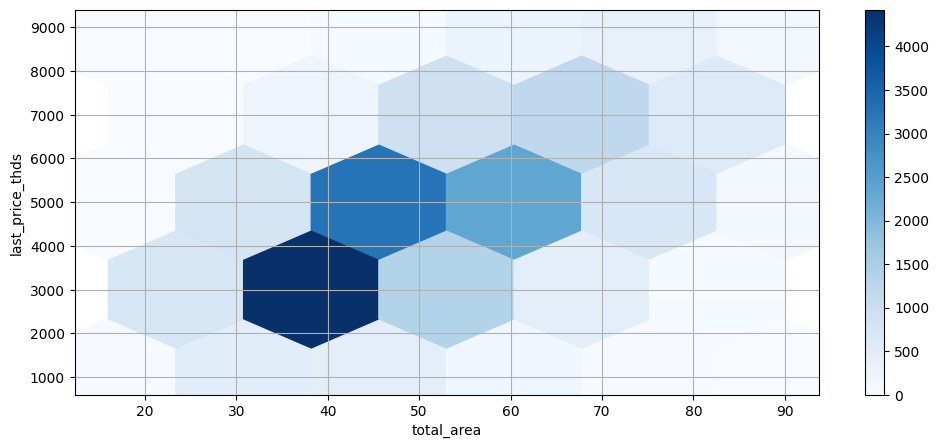

In [216]:
data.query('total_area <= 90 and \
           1000 <= last_price_thds <= 9000').plot(
                                           x='total_area', y='last_price_thds', \
                                           kind='hexbin', gridsize=5, cmap='Blues', \
                                           figsize=(12,5), grid=True, sharex=False);

<font color='DarkBlue'><i>Из представленной диаграммы видно, что с ростом общей площади растет стоимость, наибольшее количество предложений находятся в нижней левой четверти графика - в диапазоне 27-43 м2 при цене 1.75-4.25 млн руб. 

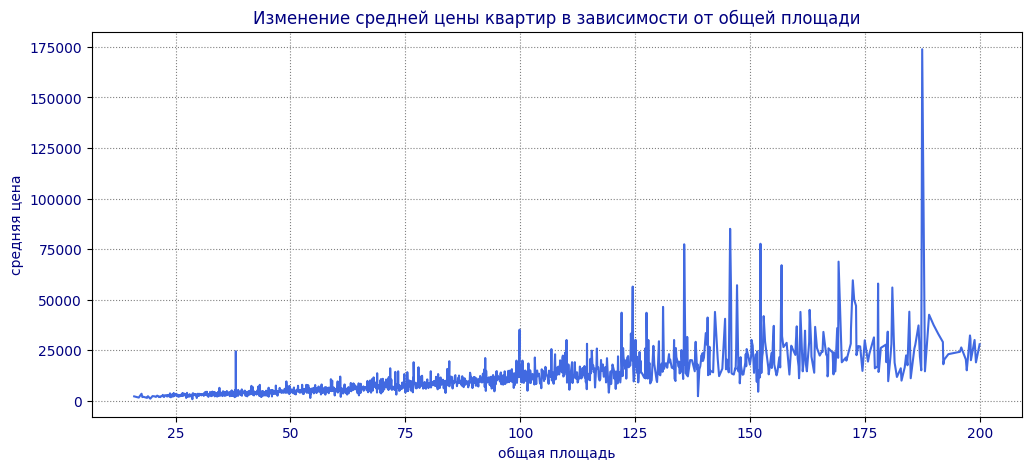

In [218]:
data.pivot_table(index='total_area', values='last_price_thds') \
        .plot(color='royalblue', legend=False, figsize=(12, 5))
plt.title("Изменение средней цены квартир в зависимости от общей площади", color='navy')
plt.xlabel("общая площадь", color='navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

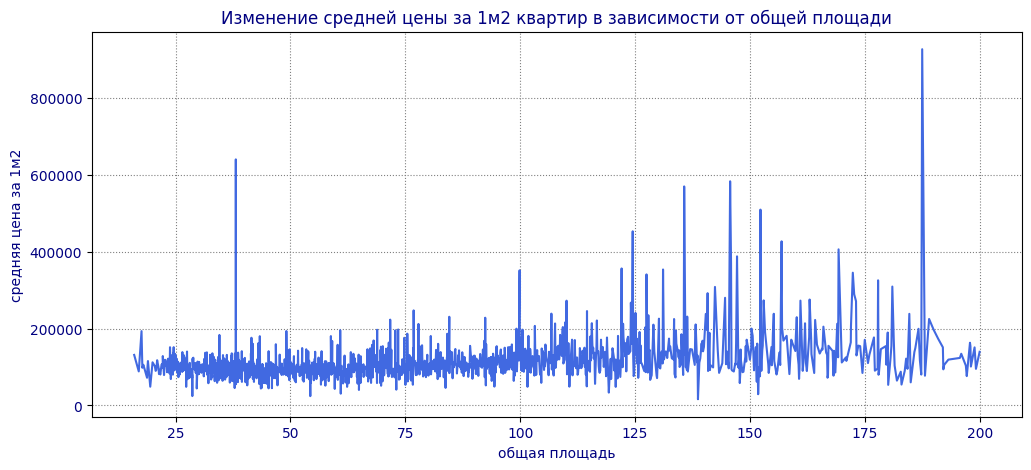

In [219]:
data.pivot_table(index='total_area', values='price_per_m2') \
    .plot(color='royalblue', legend=False, figsize=(12, 5))
plt.title("Изменение средней цены за 1м2 квартир в зависимости от общей площади", color = 'navy')
plt.xlabel("общая площадь", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена за 1м2", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Резюме:</b><br> Анализ взаимосвязи общей площади и стоиомстных харатеристик объекта показал, что с ростом общей площади квартиры:<br>- растет цена, что также следовало из выше представленной матрицы корреляции: коэффициент корреляци анализируемых показателей составляет 0,77<br>- усредненный тренд стоимости 1м2  - несущественное увеличение  

#### Влияние жилой площади объекта на его стоимость

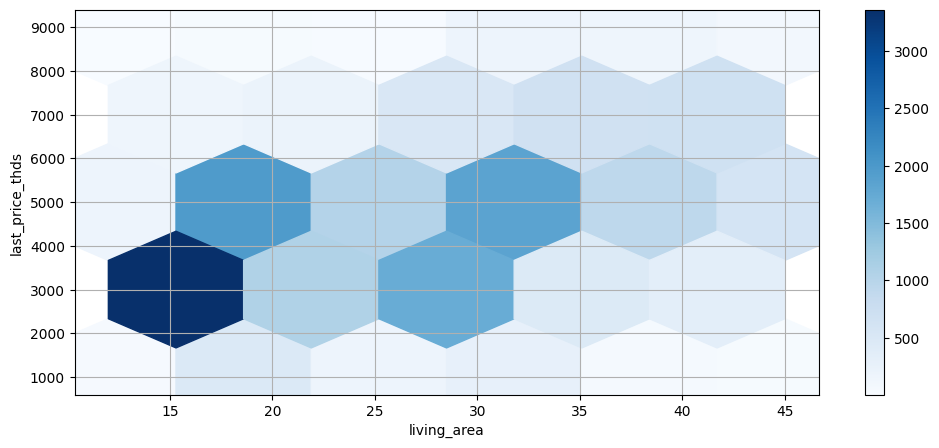

In [222]:
data.query('living_area <= 45 and \
           1000 <= last_price_thds <= 9000').plot(\
                                           x='living_area', y='last_price_thds', \
                                           kind='hexbin', gridsize=5, cmap='Blues', \
                                           figsize=(12,5), grid=True, sharex=False);

<font color='DarkBlue'><i>Из представленной диаграммы видно, что рост жилой площади приводит к несущественному росту стоимости, наибольшее количество предложений находятся в нижней левой четверти графика - в диапазоне 11-19 м2 при цене 1.8-4.2 млн руб.

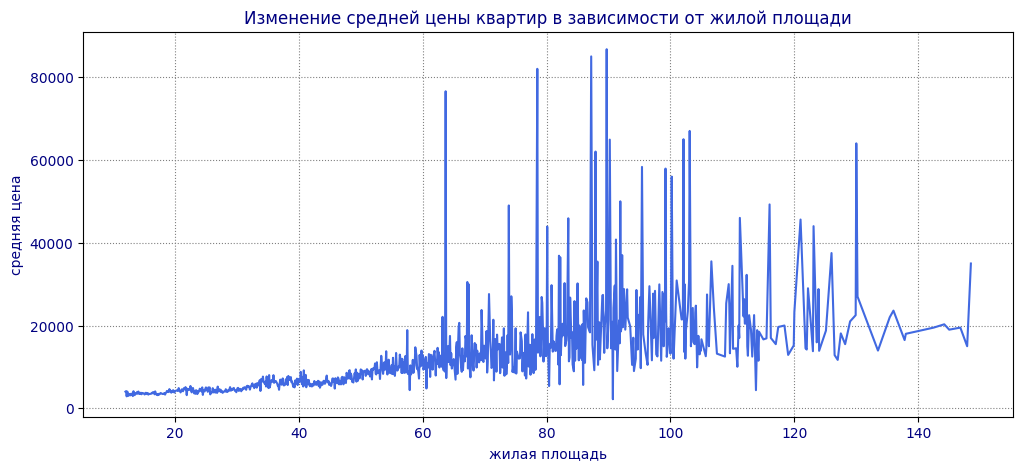

In [224]:
data.pivot_table(index='living_area', values='last_price_thds')  \
        .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартир в зависимости от жилой площади", color = 'navy')
plt.xlabel("жилая площадь", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

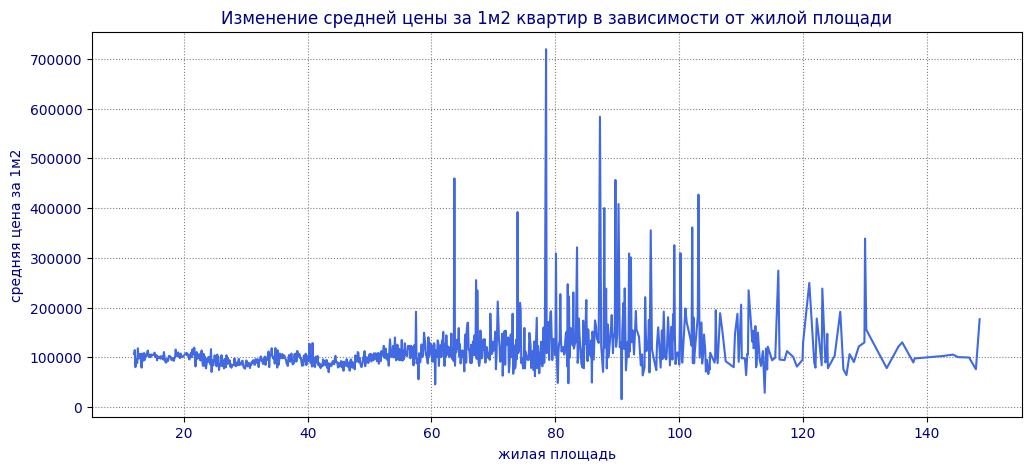

In [225]:
data.pivot_table(index='living_area', values='price_per_m2') \
 .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены за 1м2 квартир в зависимости от жилой площади", color = 'navy')
plt.xlabel("жилая площадь", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена за 1м2", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Резюме:</b><br>Анализ взаимосвязи жилой площади и стоиомстных харатеристик объекта показал:<br>- с ростом жилой площади квартиры растет цена, что также следовало из выше представленной матрицы корреляции: коэффициент корреляци анализируемых показателей составляет 0,65<br>- существенный разброс показателя стоимости 1м2 дл квартир свыше 50м2 жилой площади.

#### Влияние площади кухни объекта на его стоимость

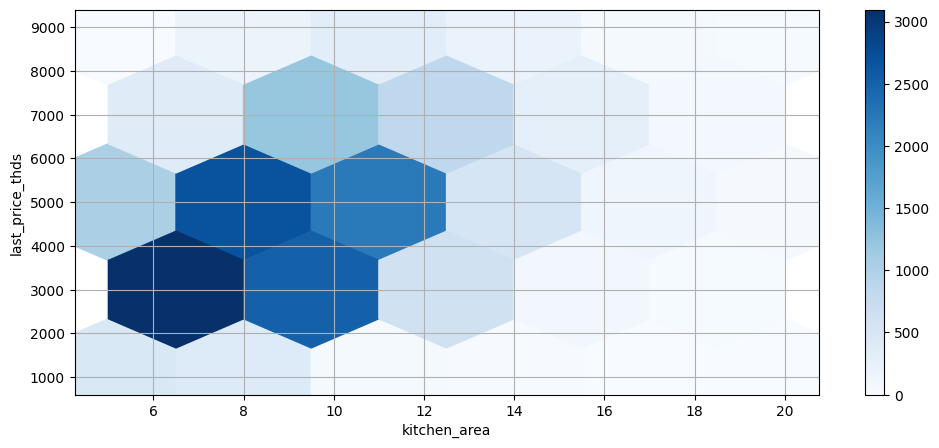

In [228]:
data.query('kitchen_area <= 20 and \
           1000 <= last_price_thds <= 9000').plot(\
                                           x='kitchen_area', y='last_price_thds', \
                                           kind='hexbin', gridsize=5, cmap='Blues', \
                                           figsize=(12,5), grid=True, sharex=False);

Из представленной диаграммы видно, наибольшее количество предложений находится в нижней левой четверти графика - в диапазоне 5-8 м2 при цене 1.8-4.2 млн руб., при этом влияние площади на стоимость объекта не прослеживается.

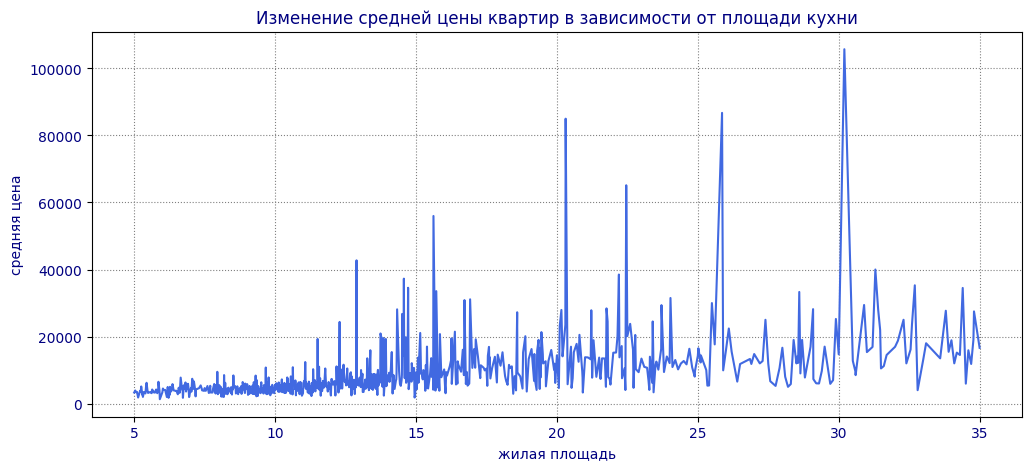

In [230]:
data.pivot_table(index='kitchen_area', values='last_price_thds') \
        .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартир в зависимости от площади кухни", color = 'navy')
plt.xlabel("жилая площадь", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

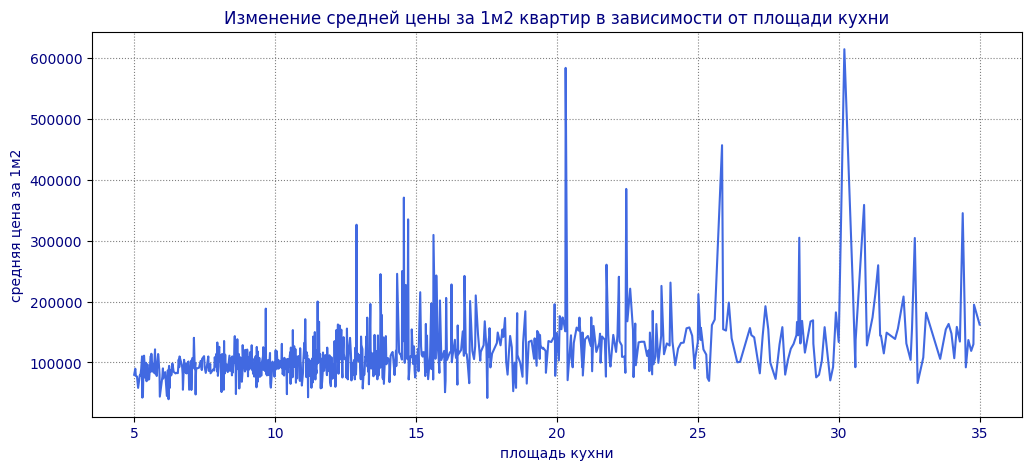

In [231]:
data.pivot_table(index='kitchen_area', values='price_per_m2') \
 .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены за 1м2 квартир в зависимости от площади кухни", color = 'navy')
plt.xlabel("площадь кухни", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена за 1м2", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Резюме:</b><br>Анализ влияния площади кухни на среднюю цену квартиры и на среднюю цену за 1 м2 отражает слабый рост цены с увеличением площади кухни и в среднем не высокую зависивмость стоимости 1м2 от площади кухни

#### Влияние количества комнат объекта на его стоимость

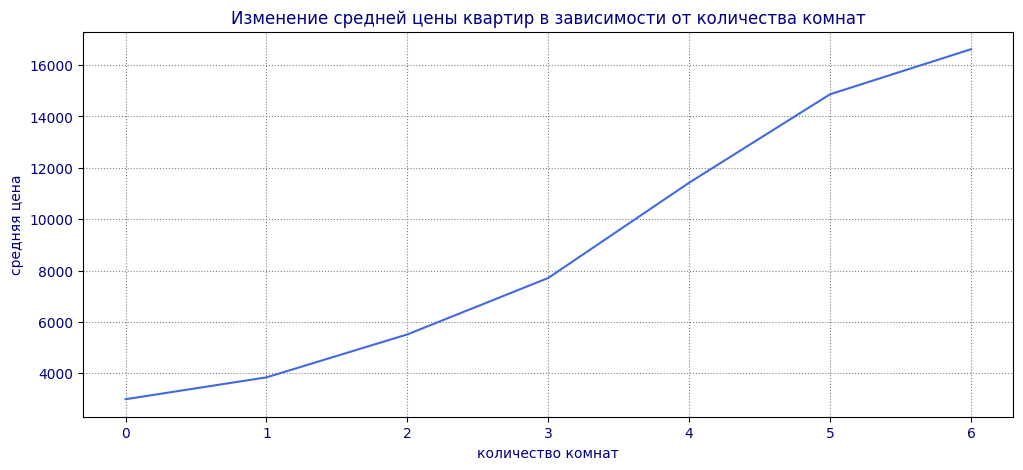

In [234]:
data.pivot_table(index='rooms', values='last_price_thds') \
        .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартир в зависимости от количества комнат", color = 'navy')
plt.xlabel("количество комнат", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

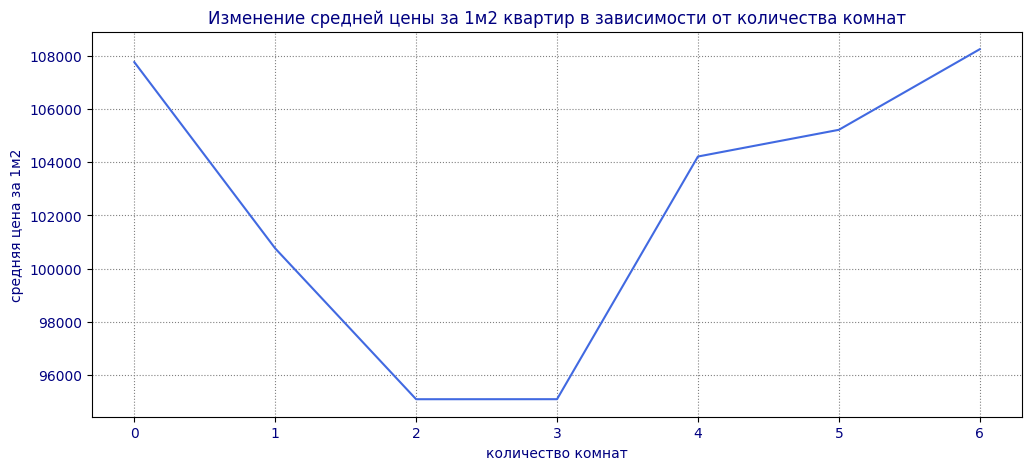

In [235]:
data.pivot_table(index='rooms', values='price_per_m2') \
 .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены за 1м2 квартир в зависимости от количества комнат", color = 'navy')
plt.xlabel("количество комнат", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена за 1м2", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Резюме:</b><br>Количество комнат и стоимость объекта имеют прямо-пропорциональную зависимость: с ростом количества комнат растет стоимоcть объекта, тогда как изменение средней цены за квадратный метр отражает значительно более высокую среднюю стоимость квадрата в 1-комнатной квартире (108,1 тыс.руб.) по сравнению с 2х и 3х -комнатными квартирами (95 тыс.руб.) и высокую стомость 1м2 в 6-ти комнатных квартирах (108,3 тыс.руб.)

 #### Влияние типа этажа объекта на его стоимость

In [238]:
data.pivot_table(index='floor_type', values='last_price_thds', aggfunc='median')

,last_price_thds
floor_type,
другой этаж,4800.0
первый этаж,3900.0
последний этаж,4300.0


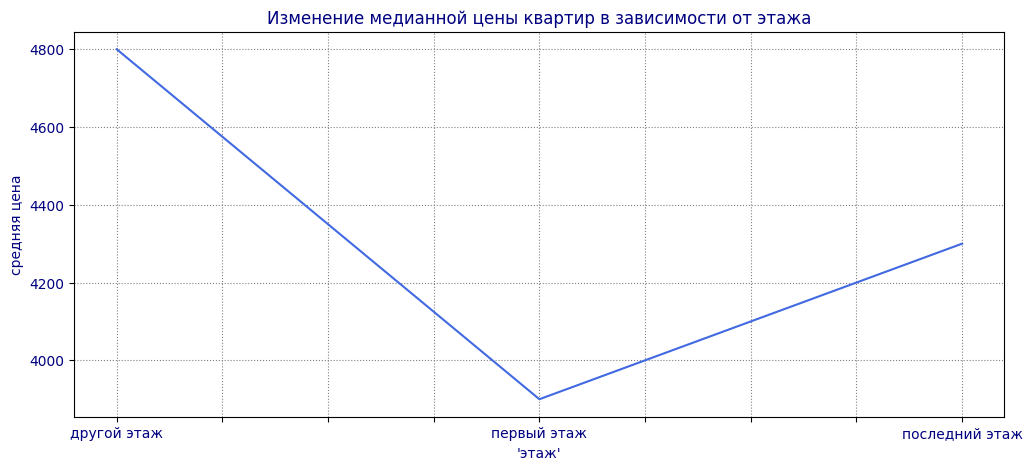

In [239]:
data.pivot_table(index='floor_type', values='last_price_thds', aggfunc='median') \
     .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение медианной цены квартир в зависимости от этажа", color = 'navy')
plt.xlabel("'этаж'", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Резюме:</b><br>В самой низкой ценовой категории представлено жилье на пером этаже: медианное значение по группе - 3,9 млн руб.; к средней ценовой категории относится жилье на послднем этаже: мединное значение по группе 4,4 млн руб., наиболее дорогостоящим является жилье, расположенное ни на первом и ни на последнем этажах: медианное значение по группе составляет 4,9 млн руб.

#### Влияние даты размещения объявления на стоимость объекта

<font color='DarkBlue'><b>день публикации

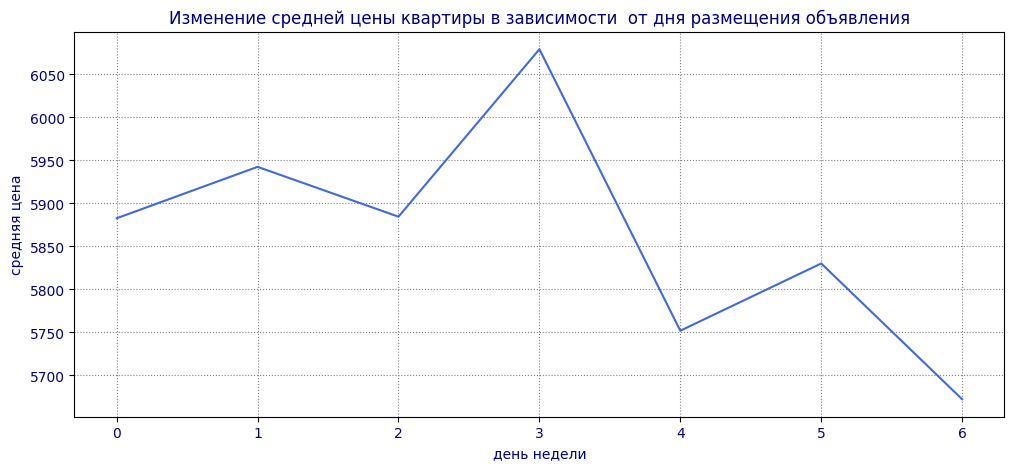

In [243]:
data.pivot_table(index='expo_week_day', values='last_price_thds', aggfunc='mean') \
    .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартиры в зависимости  от дня размещения объявления", color = 'navy')
plt.xlabel("день недели", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>месяц публикации

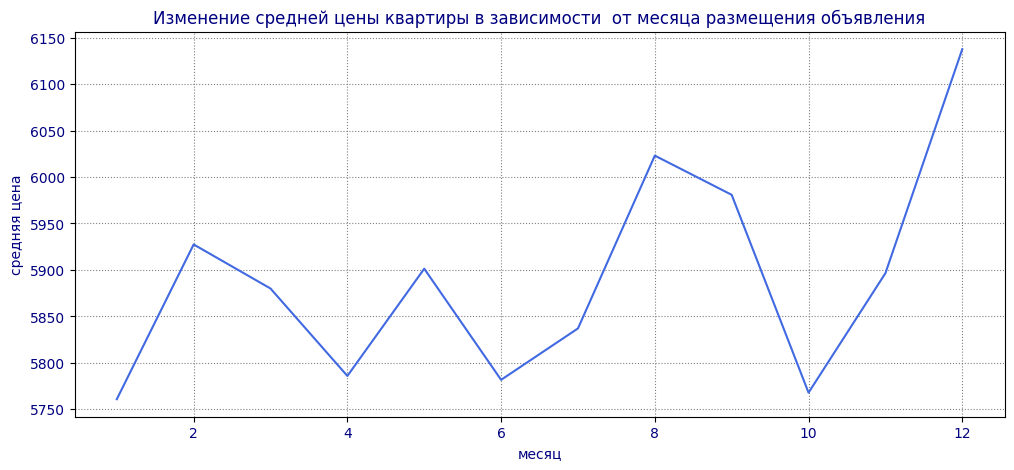

In [245]:
data.pivot_table(index='expo_month', values='last_price_thds', aggfunc='mean') \
    .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартиры в зависимости  от месяца размещения объявления", color = 'navy')
plt.xlabel("месяц", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>год публикации

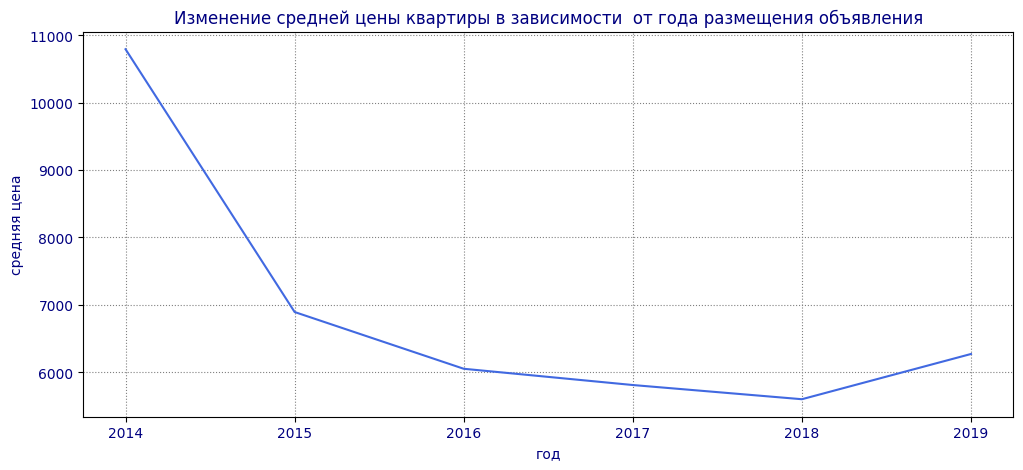

In [247]:
data.pivot_table(index='expo_year', values='last_price_thds', aggfunc='mean') \
    .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартиры в зависимости  от года размещения объявления", color = 'navy')
plt.xlabel("год", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><b>Резюме:</b><br>- в пятницу и в декабре публикуются самые дорогостоящие предложения<br>- по годам с 2016 до 2019 года видна тенеденция снижения стоиомсти предлагаемых квартир

#### Цена за квадратный метр

<font color='DarkBlue'><i>Посчитаем среднюю цену 1 квадратного метра по населенным пунктам и рассмотрим первые 10 по количеству объявлений

In [251]:
location_sqm_price = data.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count','mean']).round(2).reset_index()
location_sqm_price.columns = ['locality_name', 'ads_number','mean_sqr_m_price']
location_sqm_price_top = location_sqm_price.sort_values(by='ads_number', ascending=False).head(10)
location_sqm_price_top

,locality_name,ads_number,mean_sqr_m_price
33,Санкт-Петербург,15007,112373.55
213,поселок Мурино,566,85746.14
18,Кудрово,462,95346.08
281,поселок Шушары,427,78241.13
4,Всеволожск,388,68736.86
32,Пушкин,351,102967.85
14,Колпино,336,75310.77
223,поселок Парголово,316,90051.33
7,Гатчина,289,68894.34
5,Выборг,223,58238.31


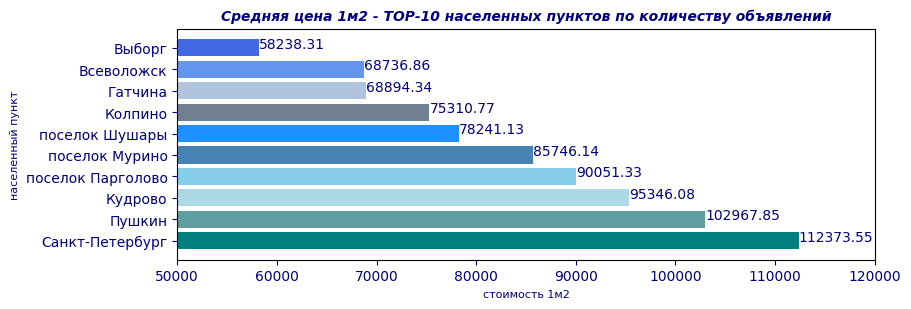

In [252]:
location_sqm_price_top = location_sqm_price_top.sort_values(by='mean_sqr_m_price', ascending=False)
fig, ax = plt.subplots(figsize=(9, 3))
y = location_sqm_price_top.mean_sqr_m_price
x = location_sqm_price_top.locality_name
ax.barh(x, y, color= ['teal', 'cadetblue', 'lightblue', 'skyblue','steelblue', 'dodgerblue', \
                       'slategrey', 'lightsteelblue','cornflowerblue', 'royalblue'])
plt.title('Средняя цена 1м2 - ТОР-10 населенных пунктов по количеству объявлений', color = 'navy', fontweight='bold', \
                                             fontsize=10, fontstyle='italic')
plt.xlabel('стоимость 1м2', color = 'navy', fontsize=8)
plt.ylabel('населенный пункт', color = 'navy', fontsize=8)
plt.xlim(50000, 120000)
plt.tick_params(colors='navy', which='both')
for i, v in enumerate(y):
    ax.text(v + 0.01, i, str(v),
            color = 'navy')
plt.show()

<font color='DarkBlue'><i>Посмотрим на минимальное значение средней стоимости квадратного метра для населенного пункта

In [254]:
location_sqm_price.loc[location_sqm_price.loc[:,'mean_sqr_m_price'] == location_sqm_price['mean_sqr_m_price'].min()]

,locality_name,ads_number,mean_sqr_m_price
258,поселок Совхозный,1,12555.56


In [255]:
location_sqm_price.loc[location_sqm_price.loc[:,'mean_sqr_m_price'] == location_sqm_price['mean_sqr_m_price'].max()]

,locality_name,ads_number,mean_sqr_m_price
8,Зеленогорск,23,116185.26


<font color='DarkBlue'><b>Резюме:</b><br>- Возглавляет ТОР-10 населенных пунктов с самым большим количеством объявлений Санкт-Петербург: 15001 объявлений. Санкт-Петербургу также принадлежит и максимальная средняя цена за 1м2  - 112.4 тыс. рублей<br>- 10-м в рейтинге населенных пунктов с самым большим количеством объявлений идет Выборгс 223 объявлениями и средней ценой за 1м2 58.2 тыс. рублей<br>- Минимальная средняя стоимость 1м2 среди 10 населенных пунктов с наибольшим количеством объявлений составляет 66.7 тыс. рублей в Волжске<br>- Минимальная средняя стоимость 1м2  в целом по анализируемой выборке - 12.5 тыс. руб. представлена в  посёлке Совхозный, тогда как максимальная средняя стоимость 1м2 - 116.2 тыс руб в Зеленогорске.

#### Объекты Санкт-Петербурга

In [258]:
data_spb = data.query('locality_name == "Санкт-Петербург" and city_center_km > 0')

In [259]:
data_spb.city_center_km.describe(percentiles=[0.05, 0.5, 0.95])

count    14932.000000
mean        11.739754
std          4.753143
min          1.000000
5%           3.000000
50%         12.000000
95%         18.000000
max         29.000000
Name: city_center_km, dtype: float64

<font color='DarkBlue'><i>Посмотрим на общие данные по стоимости 1 м2 квартир в Санкт_Петербурге

In [261]:
data_spb['price_per_m2_thds'].describe()

count    14932.000000
mean       112.127342
std         41.365239
min         15.345270
25%         90.697670
50%        104.068720
75%        122.967472
max       1542.604800
Name: price_per_m2_thds, dtype: float64

<font color='DarkBlue'><i>Из представленного выше описания видно, что средняя стоимость 1м2 составляет 112.1 тыс. руб, тогда как медианное значение - 104.1 тыс. руб.

<font color='DarkBlue'><i>Рассмотрим изменение стоимости 1м2 в зависимости от удаленности объекта от центра

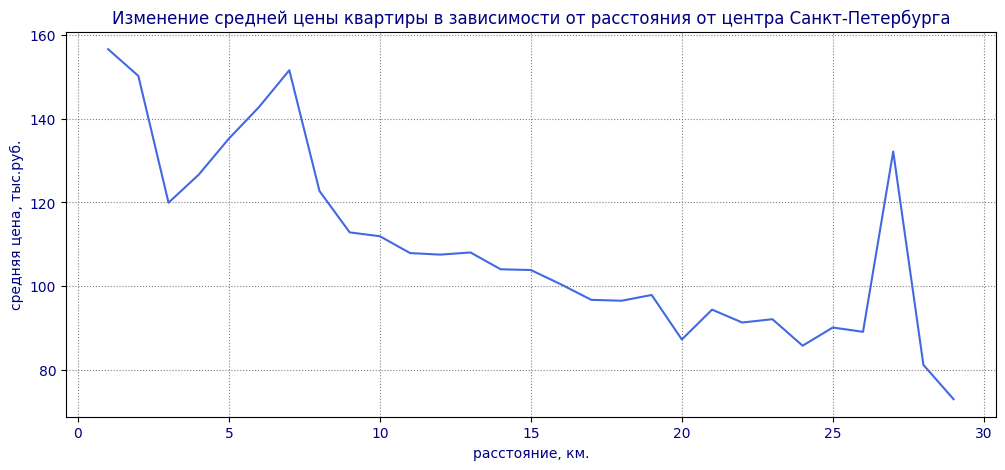

In [264]:
data_spb.groupby('city_center_km')['price_per_m2_thds'].mean() \
    .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартиры в зависимости от расстояния от центра Санкт-Петербурга", color = 'navy')
plt.xlabel("расстояние, км.", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена, тыс.руб.", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><i>Посмотрим на количество данных и в случае нерепрезентативности исключим данные об объектах, которые находятся в более чем 18 км. от центра и скорее всего уже не являются объектами Санкт-Петербурга

In [266]:
print('В данных представлено {} объектов на расстоянии более 18 км. ({:.1%} от общего количества)' \
      .format(data_spb.query('city_center_km >= 18')['city_center_km'].count(),\
              data_spb.query('city_center_km >= 18')['city_center_km'].count() / data_spb['city_center_km'].count()))

В данных представлено 930 объектов на расстоянии более 18 км. (6.2% от общего количества)


In [267]:
data_spb = data_spb.loc[data_spb.loc[:, 'city_center_km'] <= 18]

In [268]:
data_spb['price_per_m2_thds'].describe()

count    14258.000000
mean       113.044231
std         41.890853
min         15.345270
25%         91.505178
50%        104.838710
75%        123.913040
max       1542.604800
Name: price_per_m2_thds, dtype: float64

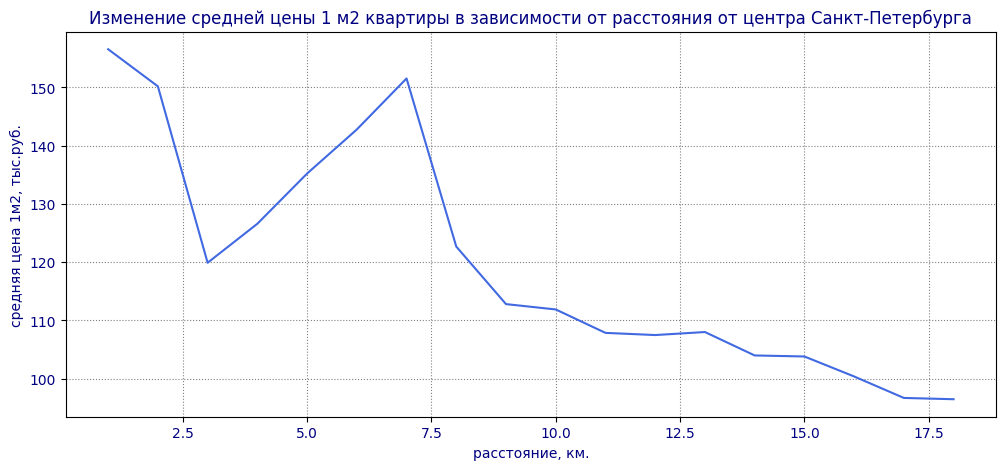

In [269]:
data_spb.groupby('city_center_km')['price_per_m2_thds'].mean() \
 .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены 1 м2 квартиры в зависимости от расстояния от центра Санкт-Петербурга", color = 'navy')
plt.xlabel("расстояние, км.", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена 1м2, тыс.руб.", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><i>Из представленных выше ряда данных и графика видно, что в целом, <b>с удалением от  центра стоимость 1м2 падает: cо 156.5 тыс. руб. в центре города до 96.5 тыс.руб. на окраине</b>. Однако из данных также видно, что в 3 км. от центра есть резкое падение стоимости 1м2 со 150.2 тыс.руб. до 119.9 тыс. руб, с последующим выравниванием отскоком цены до 135.2 тыс. руб.

<font color='DarkBlue'><i>Посмотрим на общие данные по стоимости квартир в Санкт_Петербурге

In [272]:
data_spb['last_price_thds'].describe()

count     14258.000000
mean       7154.735394
std        6229.664959
min        1200.000000
25%        4200.000000
50%        5500.000000
75%        7950.000000
max      289238.400000
Name: last_price_thds, dtype: float64

<font color='DarkBlue'><i>Из представленного выше описания видно, что средняя стоимость квартиры составляет 7.2 млн руб, тогда как медианное значение - 5.5 млн руб.

<font color='DarkBlue'><i>Рассмотрим изменение стоимости квартир в зависимости от удаленности объекта от центра

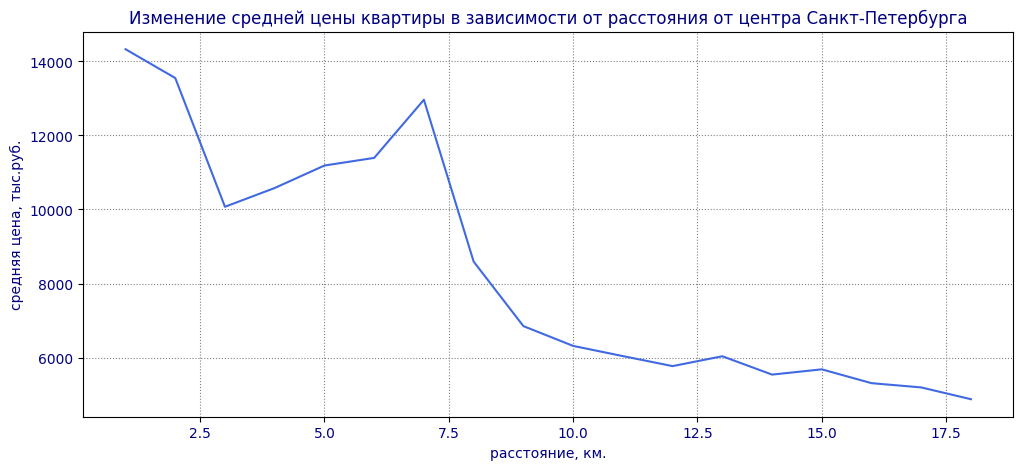

In [275]:
data_spb.groupby('city_center_km')['last_price_thds'].mean() \
    .plot(color='royalblue', figsize=(12, 5), legend=False)
plt.title("Изменение средней цены квартиры в зависимости от расстояния от центра Санкт-Петербурга", color = 'navy')
plt.xlabel("расстояние, км.", color = 'navy')
plt.xticks(color='navy')
plt.ylabel("средняя цена, тыс.руб.", color='navy')
plt.yticks(color='navy')
plt.grid(color='grey', ls=':')

<font color='DarkBlue'><i>Динамика изменения стоимости схожа с динамикой изменения стоимости 1м2 в зависимости от удаления от центра: самые дорогие квартиры (средняя цена - 14.3 млн руб.) расположены в 1 км от центра города, самые дешевые - на окраине - 4.9 млн руб. При этом также как и со стоимостью 1м2, наблюдается резкое падение стоимости квартир на расстоянии 3 км. от центра (до 10.1 млн руб.) с последующим восстановлением до 11.1 млн руб. в 5 и 6 км от центра.

<font color='DarkBlue'><i>Посмотрим более детально на квартиры, которые предлагаются в 3 км. от центра

In [278]:
data_spb.query('city_center_km == 3').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,check_area,price_per_m2,expo_week_day,expo_month,expo_year,floor_type,city_center_km,last_price_thds,price_per_m2_thds,price_group
17195,15,16200000.0,118.0,2014-12-11,4,NaN,6,88.5,6,False,...,False,137288.14,3,12,2014,последний этаж,3.0,16200.0,137.28814,от 15 до 20 млн руб.
19372,6,7500000.0,62.2,2014-12-18,5,3.02,6,55.1,1,False,...,False,120578.78,3,12,2014,первый этаж,3.0,7500.0,120.57878,от 05 до 10 млн руб.
14967,12,5800000.0,72.1,2015-01-20,3,2.82,3,43.6,3,False,...,True,80443.83,1,1,2015,последний этаж,3.0,5800.0,80.44383,от 05 до 10 млн руб.
10978,3,14990000.0,108.8,2015-04-02,3,2.90,8,61.8,2,False,...,True,137775.74,3,4,2015,другой этаж,3.0,14990.0,137.77574,от 10 до 15 млн руб.
22195,15,14000000.0,155.0,2015-04-03,5,NaN,6,100.0,4,False,...,True,90322.58,4,4,2015,другой этаж,3.0,14000.0,90.32258,от 10 до 15 млн руб.


In [279]:
round((data_spb.query('city_center_km == 3')['total_area'].mean()), 2)

84.04

In [280]:
round((data_spb.query('city_center_km == 3')['floors_total'].mean()), 2)

5.16

In [281]:
data_spb_pivot = data_spb.pivot_table(index='city_center_km', columns='floor_type', values='total_area', aggfunc='count')
data_spb_pivot.columns = ['other','1_floor', 'last_floor']
data_spb_pivot['other_share'] = round((data_spb_pivot['other'] / \
                                (data_spb_pivot['other'] + data_spb_pivot['1_floor'] + data_spb_pivot['last_floor'])*100), 2)

data_spb_pivot['1_floor_share'] = round((data_spb_pivot['1_floor'] / \
                                (data_spb_pivot['other'] + data_spb_pivot['1_floor'] + data_spb_pivot['last_floor'])*100), 2)

data_spb_pivot['last_floor_share'] = round((data_spb_pivot['last_floor'] / \
                                (data_spb_pivot['other'] + data_spb_pivot['1_floor'] + data_spb_pivot['last_floor'])*100), 2)
data_spb_pivot

,other,1_floor,last_floor,other_share,1_floor_share,last_floor_share
city_center_km,,,,,,
1.0,102,19,38,64.15,11.95,23.90
2.0,162,43,67,59.56,15.81,24.63
3.0,196,52,73,61.06,16.20,22.74
4.0,447,77,104,71.18,12.26,16.56
5.0,613,75,122,75.68,9.26,15.06
6.0,410,61,80,74.41,11.07,14.52
7.0,301,30,58,77.38,7.71,14.91
8.0,443,51,64,79.39,9.14,11.47
9.0,440,52,86,76.12,9.00,14.88


<font color='DarkBlue'><i>Из вышеуказанных данных можно предположить, что средняя стоимость в 3х км. от центра снижается в связи с тем, что значительныя часть квартир продается на 1м этаже в противовес квартирам в 5 км. от центра, среди которых доля квартир на 1м этаже в два раза меньше.

<font color='DarkBlue'><b>Резюме:</b><br>-средняя стоимость квартиры составляет 7.2 млн руб, тогда как медианное значение - 5.5 млн руб.(113.0 тыс. руб 1м2 - средняя, 104.8 тыс.руб. 1 м2 - медиана)<br>- более детальный анализ влияния удаленности объекта от центра в Санкт-Петербуре на стоимость объекта и стоимость 1м2 показал прямую зависимость: в самом центре квартиры предлагаются в среднем за 14.3 млн руб. (156.5 тыс. руб. 1м2), тогда как на окраине в 17 км. от центра - за 4.9 млн руб (96.5 тыс. руб. 1м2).

### Резюме проекта

<font color='DarkBlue'>В рамках проведения анализа данных продаже квартир были осуществлены следующие действия:<br>
<font color='DarkBlue'> 1. изучены данные, предоставленные в файле real_estate_data.csv: 23,699 записей по 22 параметрам объявлений о продаже (местоположение (включая расстояние до парков, водоемов, аэропорта и центра города) и площадь (общая, жилая, кухни) объекта, количество этажей, стоимость и пр.)<br>
<font color='DarkBlue'>2. проведена предобработка данных:<br>- выявлены пропуски в 13 из 22 наборах данных, в основном пропуски касались гео-данных, таких как: информация о близлежащих парках и водоемах (15.620 и 14.589 записи соответсвенно), близлежащих аэропортах, парках водоемах и близости к центру города (более 5,5 тыс. записей), также существенным было количество пропусков в данных о признаке принадлежности к аппартаментам (20.924 записи), о количестве балконов (11.519 записи), о высоте потолков (9.195 записи), а также в количестве дней размещения объявления о продаже (3.181 записи). Пропуски данных, где было возможным, были заменены: на медианное значение по группе объектов, на булевое значение (для пропусков данных о принадежности к аппартаментам)<br>- выявлены и удалены дубликаты (в названиях населённых пунктов) и аномалии (по количеству балконов, высоте потолков)<br>- у ряда данных скорректирован тип данных (изменены на целочисленные значения количеста балконов и этажей)<br>
<font color='DarkBlue'>3. добавлены колонки, необходимые для проведения анализа: цена квадратного метра, тип этажа квартиры, день/месяц/год публикации объявления, расстояние до центра города в км.<br>
<font color='DarkBlue'>4. проведен исследовательский анализ данных:<br>- общий статистический анализ характеристик продаваемых объектов: медианное предложение на рынке - это 2x комнатная квартира (не первый и не последний этаж) с общей площадью 52 м2, жилой площадью - 30 м2, площадью кухни - 10 м2 и высотой потолка 2,7 м в 9-ти этажном доме в 13 км. от центра и в ~450 м от парка, стоимостью - 4.7 млн рублей<br>- квартиры в среднем продаются за 82 дня, быстрой можно считать продажу за 30 дней, долгой - более 7 месяцев; за анализируемый период 2015-2019 гг. рынок показывает заметную динамику роста средней скорости продаж, наиболее ликвидными были определены квартиры в ценовом сегменте до 5 млн рублей, наименее ликвидные - в сегменте от 20 до 30 млн руб.<br>- определяющим фактором стоимости объекта недвижимости в первую очередь являются общая и жилая площадь, а также площадь кухни<br>- в самом низком ценовом сегменте находятся квартиры на 1-м этаже (медиана по группе составила 3,9 млн руб.), самые дорогие - средние этажи (медиана по группе - 4,9 млн руб.)<br>- анализ влияния даты размещения объявления на цену показал, что в пятницу и в декабре публикуются самые дорогостоящие предложения, по годам с 2016 до 2019 года видна тенеденция снижения стоиомсти предлагаемых квартир<br>- возглавляет ТОР-10 населенных пунктов с самым большим количеством объявлений Санкт-Петербург: 6330 объявлений, со средней ценой за 1м2 109,0 тыс. рублей, послеждим - десятым в рейтинге идет деревня Кудрово с 83 объявлениями и средней ценой за 1м2 90,5 тыс. рублей<br>- минимальная средняя стоимость 1м2 - 12,5 тыс. руб. представлена в посёлке Совхозный, тогда как максимальная средняя стоимость 1м2 - 116,0 тыс руб в Зеленогорске<br>-средняя стоимость квартиры составляет 7.2 млн руб, тогда как медианное значение - 5.5 млн руб.(113.0 тыс. руб 1м2 - средняя, 104.8 тыс.руб. 1 м2 - медиана)<br>- более детальный анализ влияния удаленности объекта от центра в Санкт-Петербуре на стоимость объекта и стоимость 1м2 показал прямую зависимость: в самом центре квартиры предлагаются в среднем за 14.3 млн руб. (156.5 тыс. руб. 1м2), тогда как на окраине в 17 км. от центра - за 4.9 млн руб (96.5 тыс. руб. 1м2).